# Imports

In [1]:
import numpy as np
import os, sys
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size': 30, 'font.family':'arial', 'font.weight':'normal'})
plt.rcParams["axes.linewidth"] = 1.0
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Figure 4

## Figure 4J Data

Actin-Covered Surface Area Fraction Time Series for Bivalent Crosslinkers

In [2]:
# Assemble data for figure

# Load all replicates
# Take mean and std
# Row 0 - Time
# Row 1 - fraction of occupied triangles 
jobfoldername = 'inputfiles' 
colorlist = ['#0000ff', '#ff0000', '#666666'] 
kbindvec = [1e-1, 1e+0, 1e+1] 
kunbindvec = [1e-2, 1e-1, 1e+0] 
labelvec = ['0.01', '0.1', '1.0'] 
Meanlist = []
Stdlist = []
mean_frac_bar = []
std_frac_bar = []
for diriter in range(0, 2):
    if diriter == 0:
        diroffset = 0
        dirpath = 'Figure_4-S6E-G/outputfiles/'
    else:
        diroffset = 5
        dirpath = 'Figure_4-S6E-G/outputfiles_2/'
    for koniter, kbind in enumerate(kbindvec):
        for koffiter, kunbind in enumerate (kunbindvec):
            bar_raw_data = np.array([])
            Row1 = []
            Rval = (koniter+2)*5+(koffiter+1)
            for repid in range(0+diroffset, 5+diroffset):
                fvar = dirpath+'FO_Output'+'/FO_'+jobfoldername+'_R_'+str(Rval)+'_r_'+str(repid-diroffset)+'.csv'
                df = pd.read_csv(fvar, index_col = 0)
                datavec = df.iloc[1].to_numpy()
                Row1.append(datavec)
                barstartpos = int(0.95*len(datavec))
                bar_raw_data = np.append(bar_raw_data, datavec[barstartpos:])
                print(diriter)
                print(diroffset)
                print(dirpath)
                print(repid)
                print('---')
            Row1 = np.array(Row1)
            Meanlist.append(np.mean(Row1, 0))
            Stdlist.append(np.std(Row1, 0))
            mean_frac_bar.append(np.mean(bar_raw_data))
            std_frac_bar.append(np.std(bar_raw_data))
Timevec = df.iloc[0].to_numpy()


0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4

## Figure 4K Data

Fraction of Bivalent Crosslinkers Bound to 0, 1, or 2 Actin Filaments

In [3]:
# Function to Process Data

def crossplothelper(filename, Nreps, *args):
    if len(args):
        tv = args[0]
    # KEY
    # Row 0 Time
    # Row 1 Number of bound crosslinkers MEAN
    # Row 2 Number of bound crosslinkers STD
    # Row 3 Number of filaments per crosslinker MEAN
    # Row 4 Number of filaments per crosslinker STD
    # Row 5 Number of UNIQIUE filaments per crosslinker MEAN
    # Row 6 Number of UNIQUE filaments per crosslinker STD
    # Row 7 Last 5% data Row 5 MEAN
    # Row 8 Last 5% data Row 5 STD
    # Row 9 Number of crosslinkers bound to 1 filament MEAN
    # Row 10 Number of crosslinkers bound to 1 filament STD
    # Row 11 Number of crosslinkers bound to 2 filaments MEAN
    # Row 12 Number of crosslinkers bound to 2 filaments STD
    # Row 13 Number of crosslinkers bound to 3 filaments MEAN (Not Used for mini-Lpd)
    # Row 14 Number of crosslinkers bound to 3 filaments STD (Not Used for mini-Lpd)
    # Row 15 Number of crosslinkers bound to 4 filaments MEAN (Not Used for mini-Lpd)
    # Row 16 Number of crosslinkers bound to 4 filaments STD (Not Used for mini-Lpd)
    # Row 17 5% data Number of crosslinkers bound to N \in [1, 4] filaments MEAN
    # Row 18 5% data  Number of crosslinkers bound to N \in [1, 4] filaments STD
    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []
    Row4 = []
    Row5 = []
    Row6 = []
    Row7 = []
    Row8 = []
    Row17 = []
    Row18 = []
    bar_data_1 = np.array([])
    bar_data_2 = np.array([])
    for diriter in range(0, 2):
        if diriter == 0:
            diroffset = 0
            dirpath = 'Figure_4-S6E-G/outputfiles/'
        else:
            diroffset = 5
            dirpath = 'Figure_4-S6E-G/outputfiles_2/'
        for repid in range(0+diroffset, Nreps+diroffset):
            print(diriter)
            print(diroffset)
            print(dirpath)
            print('R_'+str(Rval)+'_r_'+str(repid))
            print('---')
            fvar = dirpath+filename+str(repid-diroffset)+'.csv'
            df = pd.read_csv(fvar, index_col = 0)
            
            Row1.append(df.iloc[1].to_numpy())
            Row2.append(df.iloc[2].to_numpy())
            Row3.append(df.iloc[3].to_numpy())
            Row4.append(df.iloc[4].to_numpy())
            Row5.append(df.iloc[5].to_numpy())
            Row6.append(df.iloc[6].to_numpy())
            Row7.append(df.iloc[7].to_numpy())
            Row8.append(df.iloc[8].to_numpy())
            Row9 = df.iloc[9].to_numpy()
            Row11 = df.iloc[11].to_numpy()
            startpos = int(0.95*len(Row9))
            endpos = int(len(Row9))
            bar_data_1 = np.append(bar_data_1, (Row9[startpos:endpos]/tv))
            bar_data_2 = np.append(bar_data_2, (Row11[startpos:endpos]/tv))
            Row17.append(df.iloc[17].to_numpy())
            Row18.append(df.iloc[18].to_numpy())
 
    # Get the number of crosslinkers that are free
    bar_data_0 = 1-bar_data_1-bar_data_2
    Mean_0_fil = np.mean(bar_data_0, 0)
    Mean_1_fil = np.mean(bar_data_1, 0)
    Mean_2_fil = np.mean(bar_data_2, 0)
    Std_0_fil = np.std(bar_data_0, 0)
    Std_1_fil = np.std(bar_data_1, 0)
    Std_2_fil = np.std(bar_data_2, 0)
    return [Mean_0_fil, Mean_1_fil, Mean_2_fil, Std_0_fil, Std_1_fil, Std_2_fil] 

############################################################################################

# Assemble data for figure

kbindvec = [1e-1, 1e+0, 1e+1] 
kunbindvec = [1e-2, 1e-1, 1e+0] 
Mean_0_fil = []
Mean_1_fil = []
Mean_2_fil = []
Std_0_fil = []
Std_1_fil = []
Std_2_fil = []
jobfoldername = 'inputfiles' 
for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (kbinditer+2)*5+(kunbinditer+1) 
        filename = 'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, Nreps, 1000)
        Mean_0_fil.append(outputlist[0])
        Mean_1_fil.append(outputlist[1])
        Mean_2_fil.append(outputlist[2])
        Std_0_fil.append(outputlist[3]) 
        Std_1_fil.append(outputlist[4]) 
        Std_2_fil.append(outputlist[5]) 

kbindlist = [1e-1, 1e-1, 1e-1,
             1e+0, 1e+0, 1e+0,
             1e+1, 1e+1, 1e+1] 
kunbindlist = [1e-2, 1e-1, 1e+0,
               1e-2, 1e-1, 1e+0,
               1e-2, 1e-1, 1e+0] 
bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        '0':Mean_0_fil, '1':Mean_1_fil,
                        '2':Mean_2_fil}) 
cumarray = np.zeros((10, len(Mean_0_fil))) 
cumarray[0][:] = Mean_0_fil[:]
cumarray[1][:] = cumarray[0][:]+Mean_1_fil
cumarray[2][:] = cumarray[1][:]+Mean_2_fil
stddf = pd.DataFrame({})


0
0
Figure_4-S6E-G/outputfiles/
R_11_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_11_r_1
---
0
0
Figure_4-S6E-G/outputfiles/
R_11_r_2
---
0
0
Figure_4-S6E-G/outputfiles/
R_11_r_3
---
0
0
Figure_4-S6E-G/outputfiles/
R_11_r_4
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_11_r_5
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_11_r_6
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_11_r_7
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_11_r_8
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_11_r_9
---
0
0
Figure_4-S6E-G/outputfiles/
R_12_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_12_r_1
---
0
0
Figure_4-S6E-G/outputfiles/
R_12_r_2
---
0
0
Figure_4-S6E-G/outputfiles/
R_12_r_3
---
0
0
Figure_4-S6E-G/outputfiles/
R_12_r_4
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_12_r_5
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_12_r_6
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_12_r_7
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_12_r_8
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_12_r_9
---
0
0
Figure_4-S6E-G/outputfiles/
R_13_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_1

## Plot Figure 4J-K

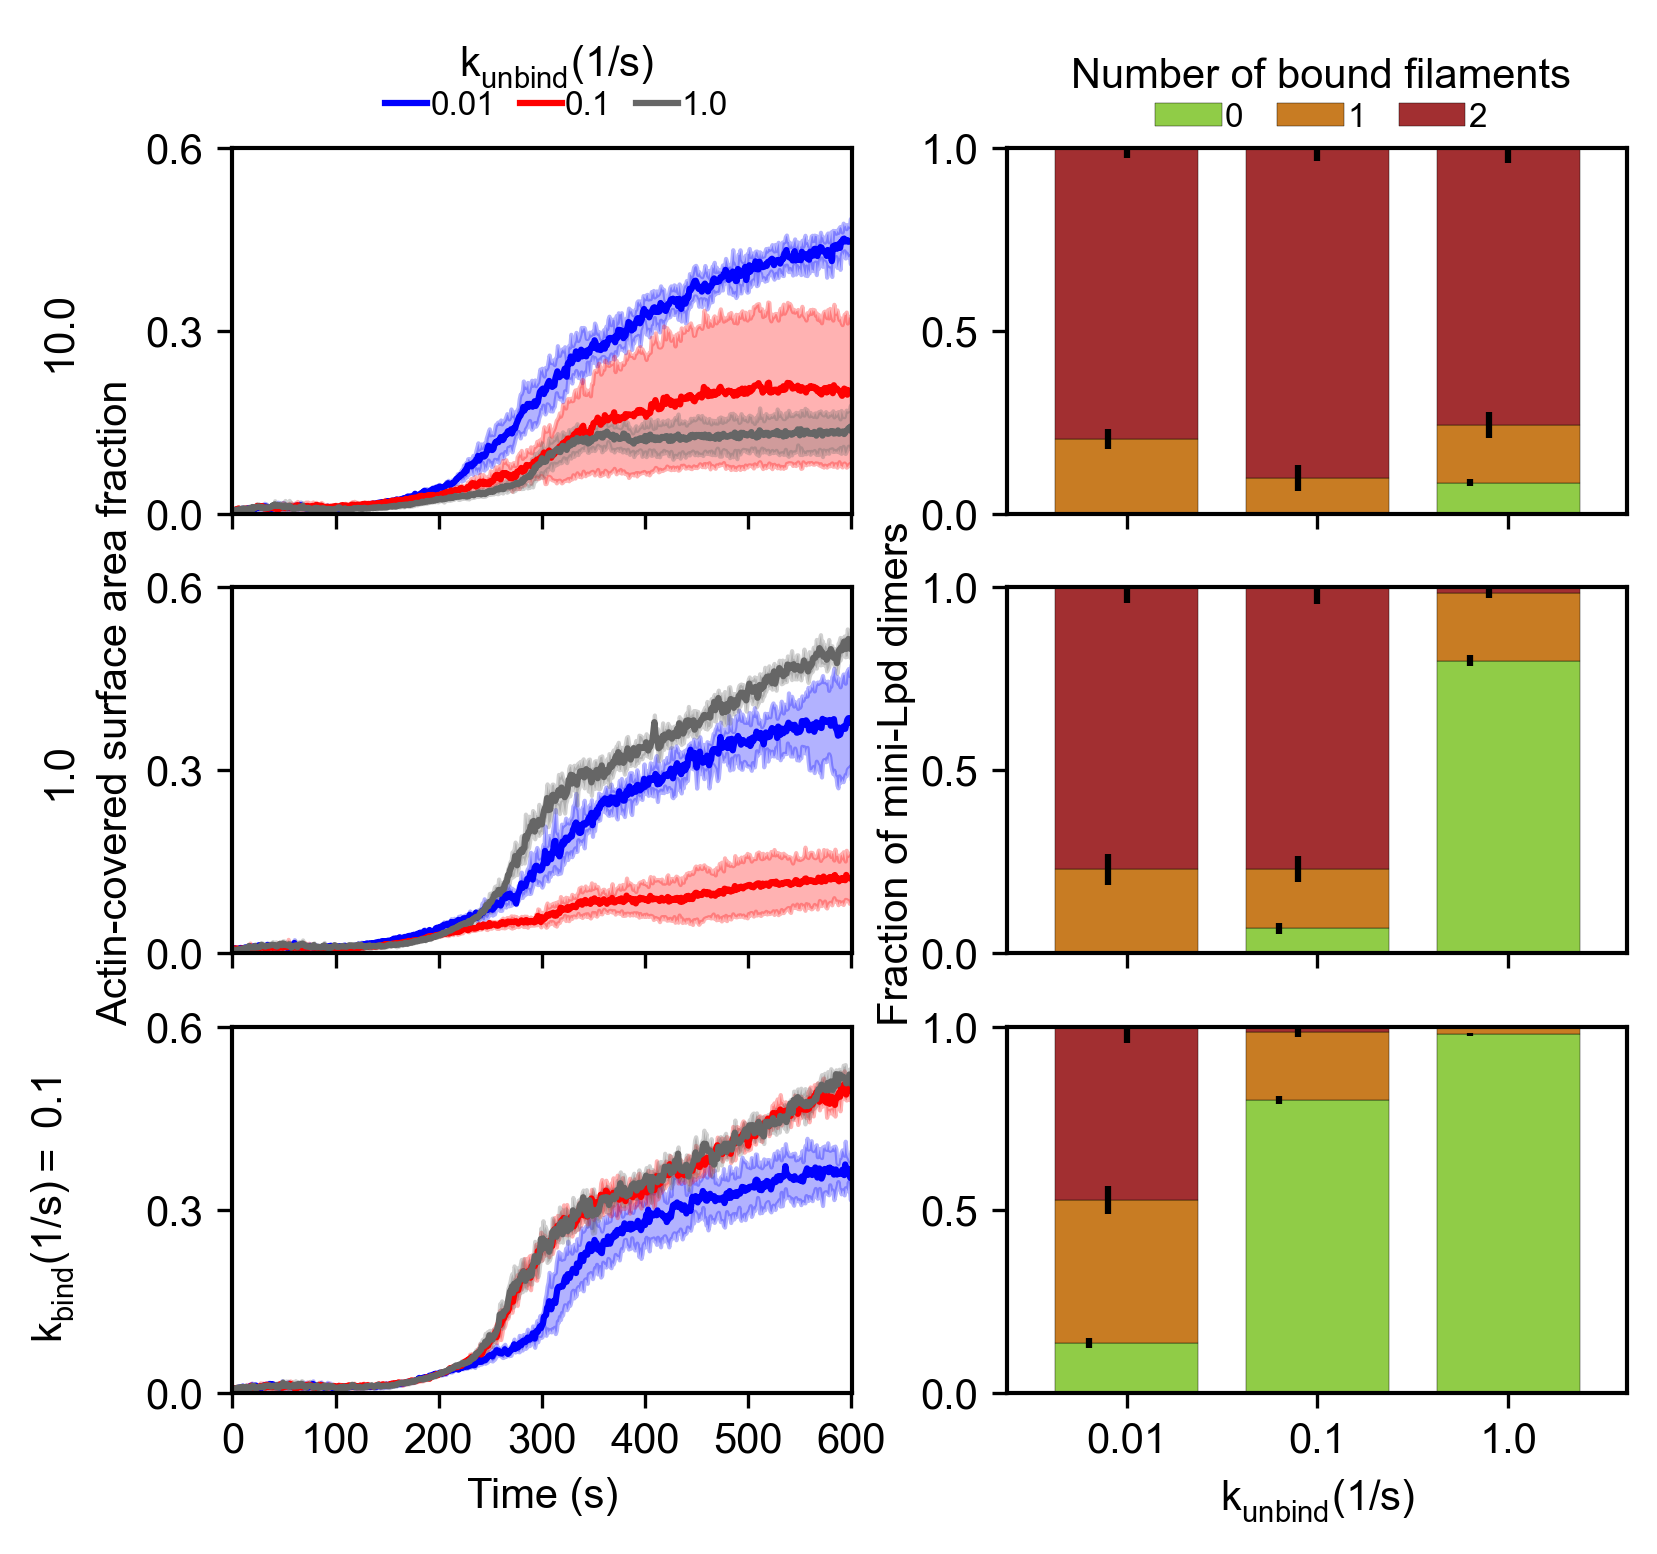

In [4]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#90CC47', '#D7B226', '#BA4820', "#a22f31"])
labelvec = ['0.01', '0.1', '1.0'] 
# Get figure
nr = 3; nc = 2 
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (5.0, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = False)

# Figure 4K
for plotcounter in range(0, nr):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 2 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], Std_0_fil[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_1_fil[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_2_fil[Rval]]))
            offset = offset + 0.1
    df = bardf[bardf["kbind"] == kbindvec[plotcounter]].drop(columns = "kbind")
    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1][1]
    df.plot(ax = ax, x = 'kunbind', kind = 'bar', stacked = True, legend = False, 
            width = 0.75, cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.5, 1.0])
    if plotcounter > 0:
        ax.set_xticklabels([])
leg = fig.legend(['0', '1', '2'], title = 'Number of bound filaments', 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (0.9625, 0.96), 
                 labelspacing = 0.2, columnspacing = 1.0, handletextpad = 0.1) 

plt.figtext(0.48, 0.3, 'Fraction of mini-Lpd dimers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][1].set_xlabel(r"$k_{unbind} (1/s)$")
axvec[1][1].set_xlabel('')
axvec[0][1].set_xlabel('')

# Figure 4J
for plotcounter in range(0, nr):
    legcell = []
    for val in range(0, nr):
        Rval = plotcounter*len(kunbindvec) + val
        ax = axvec[nr-plotcounter-1][0]
        x = ax.plot(Timevec, Meanlist[Rval], color = colorlist[val])
        legcell.append(x[0]);
        ax.fill_between(Timevec, Meanlist[Rval]-Stdlist[Rval], Meanlist[Rval]+Stdlist[Rval], 
                        color = colorlist[val], alpha = 0.3)
        ax.set_xlim([0, 601])
        ax.set_ylim([0, 0.6])
        ax.set_yticks([0, 0.3, 0.6])
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
        if plotcounter > 0:
            ax.set_xticklabels([])
plt.text(-0.04, 0.3, 'Actin-covered surface area fraction', transform = plt.gcf().transFigure, rotation = 90)
leg = fig.legend(legcell, kunbindvec, title = r"$k_{unbind} (1/s)$", 
                 ncol = 3, handlelength = 1.25, columnspacing = 0.75, handletextpad = 0.1, fontsize = 8, 
                 frameon = False, bbox_to_anchor = (0.4, 0.97), labelspacing = 0.0) 
axvec[2][0].set_xlabel('Time (s)') 
axvec[0][0].set_ylabel('10.0') 
axvec[0][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[1][0].set_ylabel('1.0') 
axvec[1][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[2][0].set_ylabel(r"$k_{bind} (1/s) =$ 0.1") 
axvec[2][0].yaxis.set_label_coords(-0.25, 0.5)

plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.25, 
                    hspace = 0.2)

# SAVE FIGURE
plt.savefig('Figure4J-K', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure4J-K.pdf', bbox_inches = 'tight')


# Figure 5

## Figure 5C Data

Actin-Covered Surface Area Fraction Time Series for Dynamic Dimerization

In [5]:
# Assemble data for figure

# Load all replicates
# Take mean and std
# Row 0 - Time
# Row 1 - fraction of occupied triangles 
jobfoldername = 'inputfiles' 
colorlist = ['#5fb549', '#7ea124', '#938c02', '#a07500', '#a75e0e', '#a84621', '#a22f31']
kbindvec = [1e+0, 1e+1] 
kunbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1]
labelvec = [r"$10^{-3}$", '0.01', '0.1', '1.0', '10.0']
Meanlist = []
Stdlist = []
mean_frac_bar = []
std_frac_bar = []
dirpath = 'Figure_5/'
for koniter, kbind in enumerate(kbindvec):
    for koffiter, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (koniter+3)*len(kunbindvec)+koffiter
        for repid in range(0, 5):
            fvar = dirpath+'outputfiles/'+'FO_Output'+'/FO_'+jobfoldername+'_R_'+str(Rval)+'_r_'+str(repid)+'.csv'
            df = pd.read_csv(fvar, index_col = 0)
            datavec = df.iloc[1].to_numpy()
            Row1.append(datavec)
            barstartpos = int(0.95*len(datavec))
            bar_raw_data = np.append(bar_raw_data, datavec[barstartpos:])
            print(Rval)
            print(repid)
            print('---')
        Row1 = np.array(Row1)
        Meanlist.append(np.mean(Row1, 0))
        Stdlist.append(np.std(Row1, 0))
        mean_frac_bar.append(np.mean(bar_raw_data))
        std_frac_bar.append(np.std(bar_raw_data))

Timevec = df.iloc[0].to_numpy()


15
0
---
15
1
---
15
2
---
15
3
---
15
4
---
16
0
---
16
1
---
16
2
---
16
3
---
16
4
---
17
0
---
17
1
---
17
2
---
17
3
---
17
4
---
18
0
---
18
1
---
18
2
---
18
3
---
18
4
---
19
0
---
19
1
---
19
2
---
19
3
---
19
4
---
20
0
---
20
1
---
20
2
---
20
3
---
20
4
---
21
0
---
21
1
---
21
2
---
21
3
---
21
4
---
22
0
---
22
1
---
22
2
---
22
3
---
22
4
---
23
0
---
23
1
---
23
2
---
23
3
---
23
4
---
24
0
---
24
1
---
24
2
---
24
3
---
24
4
---


## Figure 5D Data

Fraction of Dynamic Dimers in Various Dimer and Actin-Bound States

In [6]:
# Function to Process Data

def crossplothelper(filename, Nreps, *args):
    if len(args):
        tv = (args[0])
        print(tv)
    # KEY
    # Row 0 Time
    # Row 1 Number of filament bound dimers
    # Row 2 Number of filament bound monomers
    # Row 3 Number of free dimers
    # Row 4 Number of free monomers
    # Row 5 Monomer_0
    # Row 6 Monomer_1
    # Row 7 Dimer_0
    # Row 8 Dimer_1
    # Row 9 Dimer_2

    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []
    Row4 = []

    Row5 = []
    Row6 = []
    Row7 = []
    Row8 = []
    Row9 = []

    bar_data_bd = np.array([])
    bar_data_bm = np.array([])
    bar_data_fd = np.array([])
    bar_data_fm = np.array([])

    bar_data_m0 = np.array([])
    bar_data_m1 = np.array([])
    bar_data_d0 = np.array([])
    bar_data_d1 = np.array([])
    bar_data_d2 = np.array([])

    dirpath = 'Figure_5/'
    for repid in range(0, Nreps):
        print('R_'+str(Rval)+'_r_'+str(repid))
        print('---')
        fvar = dirpath+filename+str(repid)+'.csv'
        df = pd.read_csv(fvar, index_col = 0)
        
        Row1.append(df.iloc[1].to_numpy())
        Row2.append(df.iloc[2].to_numpy())
        Row3.append(df.iloc[3].to_numpy())
        Row4.append(df.iloc[4].to_numpy())

        Row5.append(df.iloc[5].to_numpy())
        Row6.append(df.iloc[6].to_numpy())
        Row7.append(df.iloc[7].to_numpy())
        Row8.append(df.iloc[8].to_numpy())
        Row9.append(df.iloc[9].to_numpy())
            
        Row1temp = [number/tv for number in Row1]
        Row2temp = [number/tv for number in Row2]
        Row3temp = [number/tv for number in Row3]
        Row4temp = [number/tv for number in Row4]
        
        Row5temp = [number/tv for number in Row5]
        Row6temp = [number/tv for number in Row6]
        Row7temp = [number/tv for number in Row7]
        Row8temp = [number/tv for number in Row8]
        Row9temp = [number/tv for number in Row9]

        startpos = int(0.95*len(Row1))
        endpos = int(len(Row1))

        bar_data_bd = np.append(bar_data_bd, (Row1temp[startpos:endpos]))
        bar_data_bm = np.append(bar_data_bm, (Row2temp[startpos:endpos]))
        bar_data_fd = np.append(bar_data_fd, (Row3temp[startpos:endpos]))
        bar_data_fm = np.append(bar_data_fm, (Row4temp[startpos:endpos]))

        bar_data_m0 = np.append(bar_data_m0, (Row5temp[startpos:endpos]))
        bar_data_m1 = np.append(bar_data_m1, (Row6temp[startpos:endpos]))
        bar_data_d0 = np.append(bar_data_d0, (Row7temp[startpos:endpos]))
        bar_data_d1 = np.append(bar_data_d1, (Row8temp[startpos:endpos]))
        bar_data_d2 = np.append(bar_data_d2, (Row9temp[startpos:endpos]))

    Mean_bar_data_bd = np.mean(bar_data_bd, 0)
    Mean_bar_data_bm = np.mean(bar_data_bm, 0)
    Mean_bar_data_fd = np.mean(bar_data_fd, 0)
    Mean_bar_data_fm = np.mean(bar_data_fm, 0)

    Mean_bar_data_m0 = np.mean(bar_data_m0, 0)
    Mean_bar_data_m1 = np.mean(bar_data_m1, 0)
    Mean_bar_data_d0 = np.mean(bar_data_d0, 0)
    Mean_bar_data_d1 = np.mean(bar_data_d1, 0)
    Mean_bar_data_d2 = np.mean(bar_data_d2, 0)

    Std_bar_data_bd = np.std(bar_data_bd, 0)
    Std_bar_data_bm = np.std(bar_data_bm, 0)
    Std_bar_data_fd = np.std(bar_data_fd, 0)
    Std_bar_data_fm = np.std(bar_data_fm, 0)

    Std_bar_data_m0 = np.std(bar_data_m0, 0)
    Std_bar_data_m1 = np.std(bar_data_m1, 0)
    Std_bar_data_d0 = np.std(bar_data_d0, 0)
    Std_bar_data_d1 = np.std(bar_data_d1, 0)
    Std_bar_data_d2 = np.std(bar_data_d2, 0)

    return [Mean_bar_data_bd, Mean_bar_data_bm, Mean_bar_data_fd, Mean_bar_data_fm, Mean_bar_data_m0, Mean_bar_data_m1, 
            Mean_bar_data_d0, Mean_bar_data_d1, Mean_bar_data_d2, Std_bar_data_bd, Std_bar_data_bm, Std_bar_data_fd, 
            Std_bar_data_fm, Std_bar_data_m0, Std_bar_data_m1, Std_bar_data_d0, Std_bar_data_d1, Std_bar_data_d2]

############################################################################################

# Assemble data for figure

kbindvec = [1e+0, 1e+1]
kunbindvec = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

Mean_bar_data_bd = []
Mean_bar_data_bm = []
Mean_bar_data_fd = []
Mean_bar_data_fm = []

Mean_bar_data_m0 = []
Mean_bar_data_m1 = []
Mean_bar_data_d0 = []
Mean_bar_data_d1 = []
Mean_bar_data_d2 = []

Std_bar_data_bd = []
Std_bar_data_bm = []
Std_bar_data_fd = []
Std_bar_data_fm = []

Std_bar_data_m0 = []
Std_bar_data_m1 = []
Std_bar_data_d0 = []
Std_bar_data_d1 = []
Std_bar_data_d2 = []

jobfoldername = 'inputfiles' 

for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (kbinditer+3)*len(kunbindvec)+(4-kunbinditer)
        filename = 'outputfiles/'+'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, Nreps, 2000)

        Mean_bar_data_bd.append(outputlist[0])
        Mean_bar_data_bm.append(outputlist[1])
        Mean_bar_data_fd.append(outputlist[2])
        Mean_bar_data_fm.append(outputlist[3])

        Mean_bar_data_m0.append(outputlist[4])
        Mean_bar_data_m1.append(outputlist[5])
        Mean_bar_data_d0.append(outputlist[6])
        Mean_bar_data_d1.append(outputlist[7])
        Mean_bar_data_d2.append(outputlist[8])

        Std_bar_data_bd.append(outputlist[9])
        Std_bar_data_bm.append(outputlist[10])
        Std_bar_data_fd.append(outputlist[11])
        Std_bar_data_fm.append(outputlist[12])

        Std_bar_data_m0.append(outputlist[13])
        Std_bar_data_m1.append(outputlist[14])
        Std_bar_data_d0.append(outputlist[15])
        Std_bar_data_d1.append(outputlist[16])
        Std_bar_data_d2.append(outputlist[17])
            
kbindlist = [1e+0, 1e+0, 1e+0, 1e+0, 1e+0,
             1e+1, 1e+1, 1e+1, 1e+1, 1e+1] 
kunbindlist = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3] 

bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        'm0':Mean_bar_data_m0, 'm1':Mean_bar_data_m1,
                        'd0':Mean_bar_data_d0, 'd1':Mean_bar_data_d1, 'd2':Mean_bar_data_d2}) 

cumarray = np.zeros((5, len(Mean_bar_data_d2)))
cumarray[0][:] = Mean_bar_data_m0[:]
cumarray[1][:] = cumarray[0][:]+Mean_bar_data_m1
cumarray[2][:] = cumarray[1][:]+Mean_bar_data_d0
cumarray[3][:] = cumarray[2][:]+Mean_bar_data_d1
cumarray[4][:] = cumarray[3][:]+Mean_bar_data_d2

stddf = pd.DataFrame({})


2000
R_19_r_0
---
R_19_r_1
---
R_19_r_2
---
R_19_r_3
---
R_19_r_4
---
2000
R_18_r_0
---
R_18_r_1
---
R_18_r_2
---
R_18_r_3
---
R_18_r_4
---
2000
R_17_r_0
---
R_17_r_1
---
R_17_r_2
---
R_17_r_3
---
R_17_r_4
---
2000
R_16_r_0
---
R_16_r_1
---
R_16_r_2
---
R_16_r_3
---
R_16_r_4
---
2000
R_15_r_0
---
R_15_r_1
---
R_15_r_2
---
R_15_r_3
---
R_15_r_4
---
2000
R_24_r_0
---
R_24_r_1
---
R_24_r_2
---
R_24_r_3
---
R_24_r_4
---
2000
R_23_r_0
---
R_23_r_1
---
R_23_r_2
---
R_23_r_3
---
R_23_r_4
---
2000
R_22_r_0
---
R_22_r_1
---
R_22_r_2
---
R_22_r_3
---
R_22_r_4
---
2000
R_21_r_0
---
R_21_r_1
---
R_21_r_2
---
R_21_r_3
---
R_21_r_4
---
2000
R_20_r_0
---
R_20_r_1
---
R_20_r_2
---
R_20_r_3
---
R_20_r_4
---


## Plot Figure 5C-D

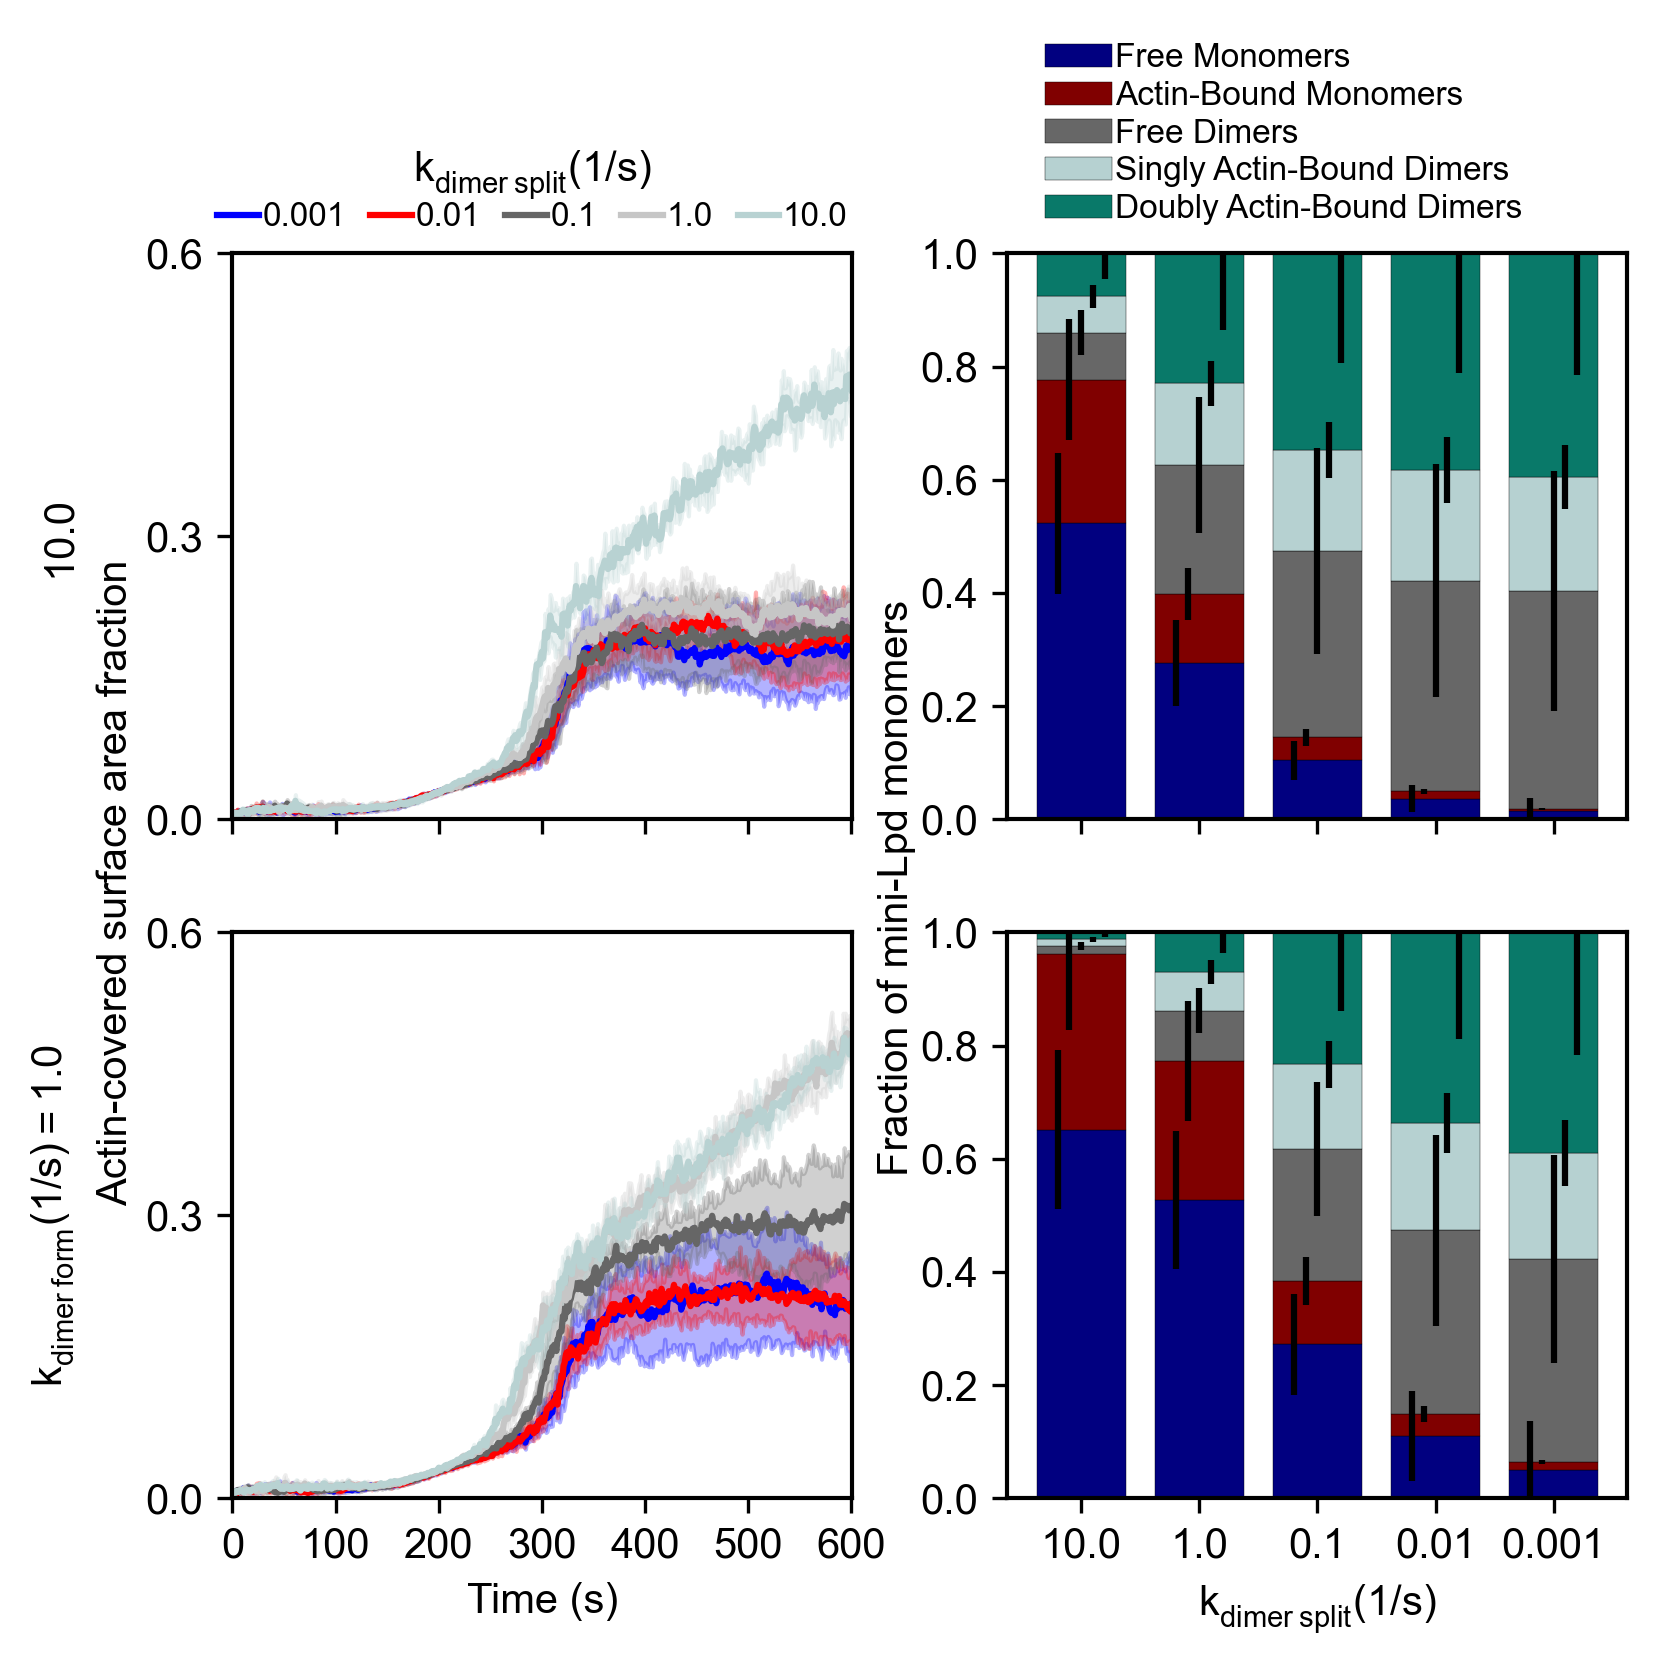

In [7]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#B8D2D2', '#097969'])
labelvec = ['10.0', '1.0', '0.1', '0.01', '0.001'] 
# Get figure
nr = 2; nc = 2
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (5.0, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = False)
plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.2, 
                    hspace = 0.15)

# Figure 4C
for plotcounter in range(nr-1, -1, -1):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 5 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], Std_bar_data_m0[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_m1[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_d0[Rval]]))
            elif pos == 2:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_d1[Rval]]))
            elif pos == 3:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_d2[Rval]]))
            offset = offset + 0.1
    df = bardf[bardf["kbind"] == kbindvec[plotcounter]].drop(columns = "kbind")
    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1][1]
    df.plot(ax = ax, x = 'kunbind', kind = 'bar', stacked = True, legend = False, 
            width = 0.75, cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 0)
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    if plotcounter > 0:
        ax.set_xticklabels([])
leg = fig.legend(['Free Monomers', 'Actin-Bound Monomers', 'Free Dimers', 'Singly Actin-Bound Dimers', 'Doubly Actin-Bound Dimers'], 
                 ncol = 1, fontsize = 8, frameon = False, bbox_to_anchor = (0.93, 1.04), 
                 labelspacing = 0.2, columnspacing = 1.0, handletextpad = 0.1)

plt.figtext(0.48, 0.27, 'Fraction of mini-Lpd monomers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][1].set_xlabel(r"$k_{dimer\:split} (1/s)$")

# Figure 4D
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#C6C6C6', '#B8D2D2'])
labelvec = ['0.001', '0.01', '0.1', '1.0', '10.0']
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2'] 
for plotcounter in range(0, nr):
    legcell = []
    for val in range(0, 5):
        Rval = plotcounter*len(kunbindvec) + val
        ax = axvec[nr-plotcounter-1][0]
        x = ax.plot(Timevec, Meanlist[Rval], color = colorlist[val])
        legcell.append(x[0]);
        ax.fill_between(Timevec, Meanlist[Rval]-Stdlist[Rval], Meanlist[Rval]+Stdlist[Rval], 
                        color = colorlist[val], alpha = 0.3)
        ax.set_xlim([0, 601])
        ax.set_ylim([0, 0.6])
        ax.set_yticks([0, 0.3, 0.6])
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
        if plotcounter > 0:
            ax.set_xticklabels([])
plt.text(-0.04, 0.25,  'Actin-covered surface area fraction', transform = plt.gcf().transFigure, rotation = 90)
leg = fig.legend(legcell, labelvec, title = r"$k_{dimer\:split} (1/s)$", 
                 ncol = 5, handlelength = 1.25, columnspacing = 0.75, handletextpad = 0.1, 
                 fontsize = 8, frameon = False, bbox_to_anchor = (0.48, 0.97), labelspacing = 0.0) 
axvec[1][0].set_xlabel('Time (s)') 
axvec[0][0].set_ylabel('10.0') 
axvec[0][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[1][0].set_ylabel(r"$k_{dimer\:form} (1/s) =$1.0") 
axvec[1][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[0][1].set_xlabel('')

plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.25, 
                    hspace = 0.2)

# SAVE FIGURE
plt.savefig('Figure5C-D.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure5C-D.pdf', bbox_inches = 'tight')


# Figure S5

## Figure S5E Data

Fraction of Bivalent Crosslinkers Bound to 0, 1, or 2 Actin Filaments

In [8]:
# Function to Process Data

def crossplothelper(filename, Nreps, *args):
    if len(args):
        tv = args[0]
    # KEY
    # Row 0 Time
    # Row 1 Number of bound crosslinkers MEAN
    # Row 2 Number of bound crosslinkers STD
    # Row 3 Number of filaments per crosslinker MEAN
    # Row 4 Number of filaments per crosslinker STD
    # Row 5 Number of UNIQIUE filaments per crosslinker MEAN
    # Row 6 Number of UNIQUE filaments per crosslinker STD
    # Row 7 Last 5% data Row 5 MEAN
    # Row 8 Last 5% data Row 5 STD
    # Row 9 Number of crosslinkers bound to 1 filament MEAN
    # Row 10 Number of crosslinkers bound to 1 filament STD
    # Row 11 Number of crosslinkers bound to 2 filaments MEAN
    # Row 12 Number of crosslinkers bound to 2 filaments STD
    # Row 13 Number of crosslinkers bound to 3 filaments MEAN (Not Used for mini-Lpd)
    # Row 14 Number of crosslinkers bound to 3 filaments STD (Not Used for mini-Lpd)
    # Row 15 Number of crosslinkers bound to 4 filaments MEAN (Not Used for mini-Lpd)
    # Row 16 Number of crosslinkers bound to 4 filaments STD (Not Used for mini-Lpd)
    # Row 17 5% data Number of crosslinkers bound to N \in [1, 4] filaments MEAN
    # Row 18 5% data  Number of crosslinkers bound to N \in [1, 4] filaments STD
    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []
    Row4 = []
    Row5 = []
    Row6 = []
    Row7 = []
    Row8 = []
    Row17 = []
    Row18 = []
    bar_data_1 = np.array([])
    bar_data_2 = np.array([])
    bar_data_3 = np.array([])
    bar_data_4 = np.array([])
    dirpath = 'Figure_S5/Figure_S5C-E/'
    for repid in range(0, Nreps):
        print('R_'+str(Rval)+'_r_'+str(repid))
        print('---')
        fvar = dirpath+filename+str(repid)+'.csv'
        df = pd.read_csv(fvar, index_col = 0)
        Timevec = df.iloc[0].to_numpy()
        Row1.append(df.iloc[1].to_numpy())
        Row2.append(df.iloc[2].to_numpy())
        Row3.append(df.iloc[3].to_numpy())
        Row4.append(df.iloc[4].to_numpy())
        Row5.append(df.iloc[5].to_numpy())
        Row6.append(df.iloc[6].to_numpy())
        Row7.append(df.iloc[7].to_numpy())
        Row8.append(df.iloc[8].to_numpy())        
        Row9 = df.iloc[9].to_numpy()
        Row11 = df.iloc[11].to_numpy()
        Row13 = df.iloc[13].to_numpy()
        Row15 = df.iloc[15].to_numpy()
        startpos = int(0.95*len(Row9))
        endpos = int(len(Row9))
        bar_data_1 = np.append(bar_data_1, (Row9[startpos:endpos]/tv))
        bar_data_2 = np.append(bar_data_2, (Row11[startpos:endpos]/tv))
        bar_data_3 = np.append(bar_data_3, (Row13[startpos:endpos]/tv))
        bar_data_4 = np.append(bar_data_4, (Row15[startpos:endpos]/tv))    
        Row17.append(df.iloc[17].to_numpy())
        Row18.append(df.iloc[18].to_numpy())
    
    # Get the number of VASP that is free
    bar_data_0 = 1-bar_data_1-bar_data_2-bar_data_3-bar_data_4 
    Mean_0_fil = np.mean(bar_data_0, 0)
    Mean_1_fil = np.mean(bar_data_1, 0)
    Mean_2_fil = np.mean(bar_data_2, 0)
    Mean_3_fil = np.mean(bar_data_3, 0)
    Mean_4_fil = np.mean(bar_data_4, 0)
    Std_0_fil = np.std(bar_data_0, 0)
    Std_1_fil = np.std(bar_data_1, 0)
    Std_2_fil = np.std(bar_data_2, 0)
    Std_3_fil = np.std(bar_data_3, 0)
    Std_4_fil = np.std(bar_data_4, 0)
    return [Mean_0_fil, Mean_1_fil, Mean_2_fil, Mean_3_fil, Mean_4_fil, 
            Std_0_fil, Std_1_fil, Std_2_fil, Std_3_fil, Std_4_fil] 

############################################################################################

# Assemble data for figure

kbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
kunbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
Ncrosslinker = [1000, 5000, 10000, 15000, 20000]
Mean_0_fil = []
Mean_1_fil = []
Mean_2_fil = []
Mean_3_fil = []
Mean_4_fil = []
Std_0_fil = []
Std_1_fil = []
Std_2_fil = []
Std_3_fil = []
Std_4_fil = []
jobfoldername = 'inputfiles' 
for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = kbinditer*len(kunbindvec)+kunbinditer
        filename = 'outputfiles/'+'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        N = Ncrosslinker[kbinditer] 
        outputlist = crossplothelper(filename, Nreps, N)
        Mean_0_fil.append(outputlist[0])
        Mean_1_fil.append(outputlist[1])
        Mean_2_fil.append(outputlist[2])
        Mean_3_fil.append(outputlist[3])
        Mean_4_fil.append(outputlist[4])
        Std_0_fil.append(outputlist[5]) 
        Std_1_fil.append(outputlist[6]) 
        Std_2_fil.append(outputlist[7]) 
        Std_3_fil.append(outputlist[8])
        Std_4_fil.append(outputlist[9])
kbindlist = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3,
                1e-2, 1e-2, 1e-2, 1e-2, 1e-2,
                1e-1, 1e-1, 1e-1, 1e-1, 1e-1,
                1e+0, 1e+0, 1e+0, 1e+0, 1e+0,
                1e+1, 1e+1, 1e+1, 1e+1, 1e+1] 
kunbindlist = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1,
                1e-3, 1e-2, 1e-1, 1e+0, 1e+1,
                1e-3, 1e-2, 1e-1, 1e+0, 1e+1,
                1e-3, 1e-2, 1e-1, 1e+0, 1e+1,
                1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        '0':Mean_0_fil, '1':Mean_1_fil,
                        '2':Mean_2_fil})
cumarray = np.zeros((10, len(Mean_0_fil))) 
cumarray[0][:] = Mean_0_fil[:]
cumarray[1][:] = cumarray[0][:]+Mean_1_fil
cumarray[2][:] = cumarray[1][:]+Mean_2_fil
cumarray[3][:] = cumarray[2][:]+Mean_3_fil
cumarray[4][:] = cumarray[3][:]+Mean_4_fil

stddf = pd.DataFrame({})


R_0_r_0
---
R_0_r_1
---
R_0_r_2
---
R_0_r_3
---
R_0_r_4
---
R_1_r_0
---
R_1_r_1
---
R_1_r_2
---
R_1_r_3
---
R_1_r_4
---
R_2_r_0
---
R_2_r_1
---
R_2_r_2
---
R_2_r_3
---
R_2_r_4
---
R_3_r_0
---
R_3_r_1
---
R_3_r_2
---
R_3_r_3
---
R_3_r_4
---
R_4_r_0
---
R_4_r_1
---
R_4_r_2
---
R_4_r_3
---
R_4_r_4
---
R_5_r_0
---
R_5_r_1
---
R_5_r_2
---
R_5_r_3
---
R_5_r_4
---
R_6_r_0
---
R_6_r_1
---
R_6_r_2
---
R_6_r_3
---
R_6_r_4
---
R_7_r_0
---
R_7_r_1
---
R_7_r_2
---
R_7_r_3
---
R_7_r_4
---
R_8_r_0
---
R_8_r_1
---
R_8_r_2
---
R_8_r_3
---
R_8_r_4
---
R_9_r_0
---
R_9_r_1
---
R_9_r_2
---
R_9_r_3
---
R_9_r_4
---
R_10_r_0
---
R_10_r_1
---
R_10_r_2
---
R_10_r_3
---
R_10_r_4
---
R_11_r_0
---
R_11_r_1
---
R_11_r_2
---
R_11_r_3
---
R_11_r_4
---
R_12_r_0
---
R_12_r_1
---
R_12_r_2
---
R_12_r_3
---
R_12_r_4
---
R_13_r_0
---
R_13_r_1
---
R_13_r_2
---
R_13_r_3
---
R_13_r_4
---
R_14_r_0
---
R_14_r_1
---
R_14_r_2
---
R_14_r_3
---
R_14_r_4
---
R_15_r_0
---
R_15_r_1
---
R_15_r_2
---
R_15_r_3
---
R_15_r_4
---
R_16_r_0
-

## Plot Figure S5E

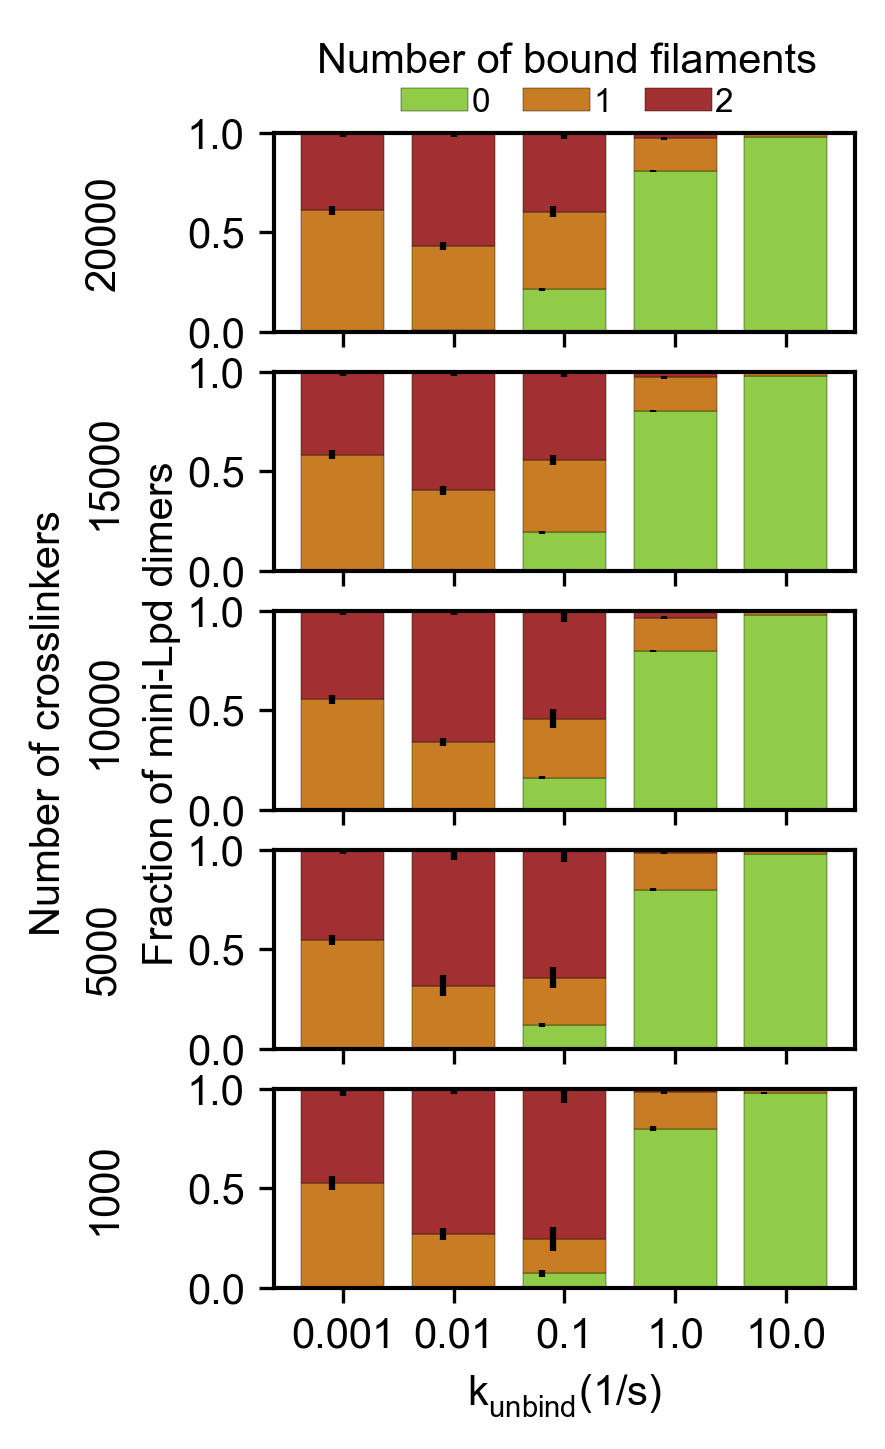

In [9]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#90CC47', '#D7B226', '#BA4820', "#a22f31"])
labelvec = ['0.001', '0.01', '0.1', '1.0', '10.0'] 
ylabelvec = [0.2, 0.4, 0.8, 1.0, 2.0]
# Get figure
nr = len(kbindvec); nc = 1
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (2.5, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = True, sharey = True)

for plotcounter in range(0, nr):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 2 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], Std_0_fil[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_1_fil[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_2_fil[Rval]]))
            offset = offset + 0.1

    df = bardf[bardf["kbind"] == kbindvec[plotcounter]].drop(columns = "kbind")

    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1]
    df.plot(ax = ax, x = 'kunbind', kind = 'bar', stacked = True, legend = False, 
            width = 0.75,
            cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.5, 1.0])

leg = fig.legend(['0', '1', '2'], title = 'Number of bound filaments', 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (0.89, 0.96), 
                 labelspacing = 0.2, columnspacing = 1.0, handletextpad = 0.1) 
plt.figtext(-0.05, 0.33, 'Fraction of mini-Lpd dimers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1].set_xlabel(r"$k_{unbind} (1/s)$")
axvec[0].set_ylabel('20000') 
axvec[0].yaxis.set_label_coords(-0.26, 0.5)
axvec[1].set_ylabel('15000') 
axvec[1].yaxis.set_label_coords(-0.26, 0.5)
axvec[2].set_ylabel('10000') 
axvec[2].yaxis.set_label_coords(-0.26, 0.5)
axvec[3].set_ylabel('5000') 
axvec[3].yaxis.set_label_coords(-0.26, 0.5)
axvec[4].set_ylabel('1000') 
axvec[4].yaxis.set_label_coords(-0.26, 0.5)
plt.text(-0.2, 0.35, 'Number of crosslinkers', transform = plt.gcf().transFigure, rotation = 90)

# SAVE FIGURE
plt.savefig('Figure_S5E.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S5E.pdf', bbox_inches = 'tight')


# Figure S6

## Figure S6B Data

Actin-Covered Surface Area Fraction Time Series for Condensates Composed of Various Ratios of Tetravalent and Bivalent Crosslinkers

In [10]:
# Assemble data for figure

# Load all replicates
# Take mean and std
# Row 0 - Time
# Row 1 - fraction of occupied triangles 
jobfoldername = 'inputfiles' 
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2']
kbindvec = ['Ring-Ring', 'Ring-Shell', 'Shell-Ring'] 
kunbindvec = ['1000:0', '750:250', '500:500', '250:750', '0:1000']
labelvec = ['1000:0', '750:250', '500:500', '250:750', '0:1000']
Meanlist = []
Stdlist = []
mean_frac_bar = []
std_frac_bar = []
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
dirpath = 'Figure_S6A-D/'
for koniter, kbind in enumerate(kbindvec):
    for koffiter, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = koniter*len(kunbindvec)+koffiter
        for repid in range(0, 5):
            fvar = dirpath+'outputfiles/'+'FO_Output'+'/FO_'+jobfoldername+'_R_'+str(Rval)+'_r_'+str(repid)+'.csv'
            df = pd.read_csv(fvar, index_col = 0)
            datavec = df.iloc[1].to_numpy()
            Row1.append(datavec)
            barstartpos = int(0.95*len(datavec))
            bar_raw_data = np.append(bar_raw_data, datavec[barstartpos:])
            print(Rval)
            print(repid)
            print('---')
        Row1 = np.array(Row1)
        Meanlist.append(np.mean(Row1, 0))
        Stdlist.append(np.std(Row1, 0))
        mean_frac_bar.append(np.mean(bar_raw_data))
        std_frac_bar.append(np.std(bar_raw_data))

Timevec = df.iloc[0].to_numpy()


0
0
---
0
1
---
0
2
---
0
3
---
0
4
---
1
0
---
1
1
---
1
2
---
1
3
---
1
4
---
2
0
---
2
1
---
2
2
---
2
3
---
2
4
---
3
0
---
3
1
---
3
2
---
3
3
---
3
4
---
4
0
---
4
1
---
4
2
---
4
3
---
4
4
---
5
0
---
5
1
---
5
2
---
5
3
---
5
4
---
6
0
---
6
1
---
6
2
---
6
3
---
6
4
---
7
0
---
7
1
---
7
2
---
7
3
---
7
4
---
8
0
---
8
1
---
8
2
---
8
3
---
8
4
---
9
0
---
9
1
---
9
2
---
9
3
---
9
4
---
10
0
---
10
1
---
10
2
---
10
3
---
10
4
---
11
0
---
11
1
---
11
2
---
11
3
---
11
4
---
12
0
---
12
1
---
12
2
---
12
3
---
12
4
---
13
0
---
13
1
---
13
2
---
13
3
---
13
4
---
14
0
---
14
1
---
14
2
---
14
3
---
14
4
---


## Plot Figure S6B

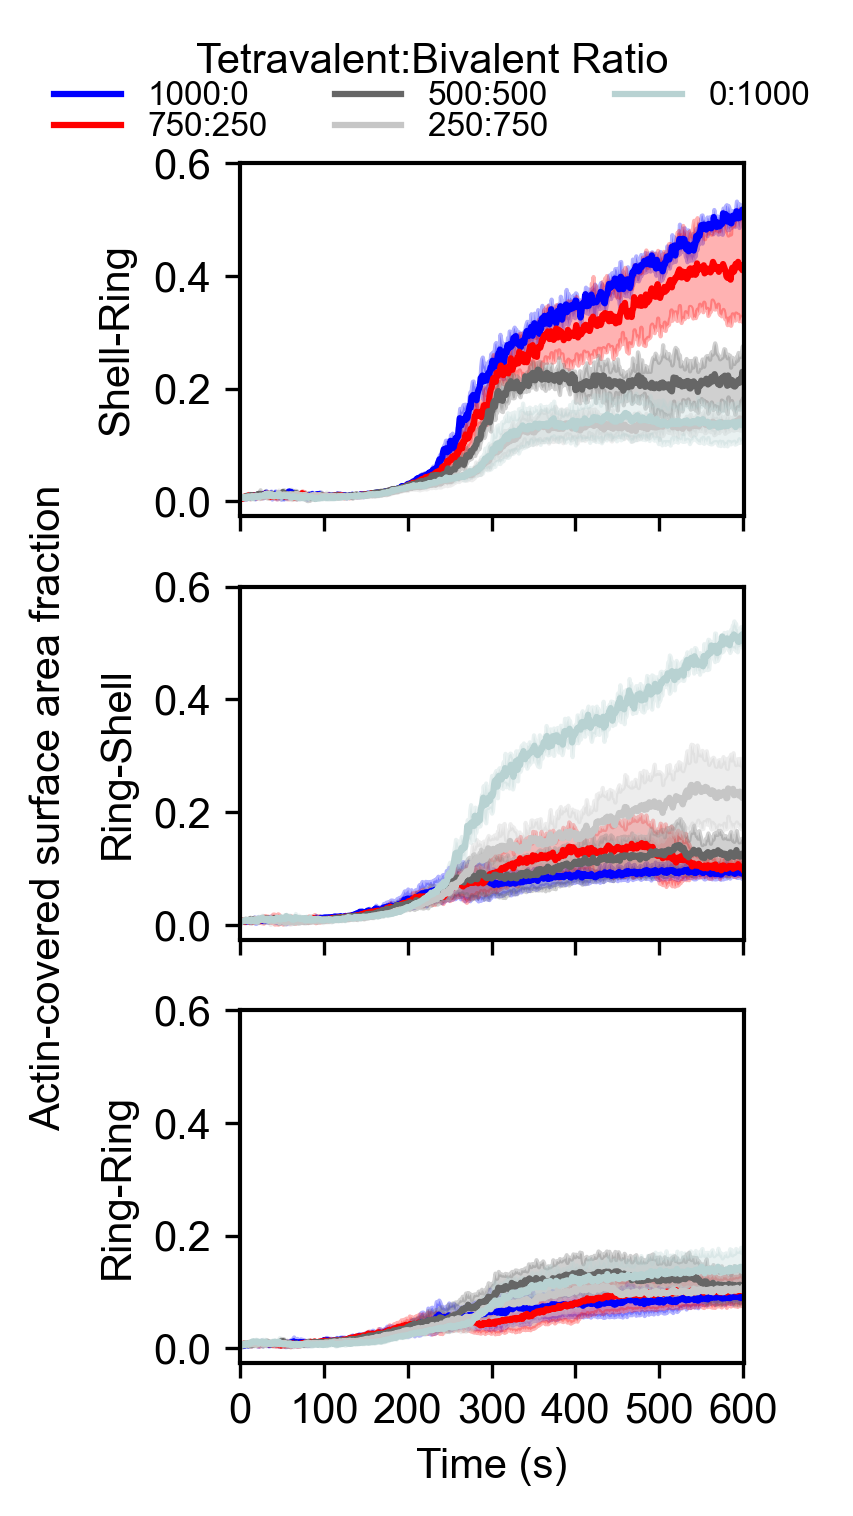

In [11]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#d47e30', '#B8D2D2', '#097969'])
labelvec = ['10.0', '1.0', '0.1', '0.01', '0.001']

nr = 3; nc = 1 
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (2, 5), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = True, sharey = True)
for plotcounter in range(0, nr):
    legcell = []
    for val in range(0, 5): 
        Rval = plotcounter*len(kunbindvec) + val
        ax = axvec[nr-plotcounter-1]
        x = ax.plot(Timevec, Meanlist[Rval], color = colorlist[val])
        legcell.append(x[0]);
        ax.fill_between(Timevec, Meanlist[Rval]-Stdlist[Rval], Meanlist[Rval]+Stdlist[Rval], 
                        color = colorlist[val], alpha = 0.3)
plt.text(-0.2, 0.26,  'Actin-covered surface area fraction', transform = plt.gcf().transFigure, rotation = 90)
axvec[2].set_xlabel('Time (s)') 
axvec[2].set_xlim([0, 601]) 
axvec[2].set_yticks([0, 0.2, 0.4, 0.6]) 
axvec[2].set_xticks([0, 100, 200, 300, 400, 500, 600]) 
axvec[2].set_ylabel(r"Ring-Ring")
axvec[1].set_ylabel(r"Ring-Shell")
axvec[0].set_ylabel(r"Shell-Ring")
leg = fig.legend(legcell, kunbindvec, title = r"Tetravalent:Bivalent Ratio", 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (1.15, 1.0), labelspacing = 0.0)

plt.subplots_adjust(left = 0.15,
                    right = 0.99,
                    bottom = 0.1, 
                    top = 0.9,
                    wspace = 0.0, 
                    hspace = 0.2)

# SAVE FIGURE
plt.savefig('Figure_S6B', dpi = 300, bbox_inches = 'tight')
plt.savefig('Figure_S6B.pdf', dpi = 300, bbox_inches = 'tight')


## Figure S6C-D Data

C: Fraction of Tetravalent Crosslinkers Bound to 0, 1, 2, 3, or 4 Actin Filaments 

D: Fraction of Bivalent Crosslinkers Bound to 0, 1, or 2 Actin Filaments

In [12]:
# Function to Process Data

def crossplothelper(filename, Nreps, *args):
    if len(args):
        tv = (args[0])
        print(tv)
    # KEY
    # Row 0 Time
    # Row 1 Number of bound crosslinkers MEAN
    # Row 2 Number of bound crosslinkers STD
    # Row 3 Number of filaments per crosslinker MEAN
    # Row 4 Number of filaments per crosslinker STD

    # Row 5 Number of UNIQIUE filaments per bivalent crosslinker MEAN
    # Row 6 Number of UNIQUE filaments per bivalent crosslinker STD
    # Row 7 Last 5% data Row 5 MEAN
    # Row 8 Last 5% data Row 5 STD
    # Row 9 Number of mini-Lpd bound to 1 filament MEAN
    # Row 10 Number of mini-Lpd bound to 1 filament STD
    # Row 11 Number of mini-Lpd bound to 2 filaments MEAN
    # Row 12 Number of mini-Lpd bound to 2 filaments STD
    # Row 13 Number of mini-Lpd bound to 3 filaments MEAN (Not Used)
    # Row 14 Number of mini-Lpd bound to 3 filaments STD (Not Used)
    # Row 15 Number of mini-Lpd bound to 4 filaments MEAN (Not Used)
    # Row 16 Number of mini-Lpd bound to 4 filaments STD (Not Used)
    # Row 17 5% data Number of mini-Lpd bound to N \in [1, 4] filaments MEAN
    # Row 18 5% data  Number of mini-Lpd bound to N \in [1, 4] filaments STD

    # Row 19 Number of UNIQIUE filaments per tetravalent crosslinker MEAN
    # Row 20 Number of UNIQUE filaments per tetravalent crosslinker STD
    # Row 21 Last 5% data Row 19 MEAN
    # Row 22 Last 5% data Row 19 STD
    # Row 23 Number of VASP bound to 1 filament MEAN
    # Row 24 Number of VASP bound to 1 filament STD
    # Row 25 Number of VASP bound to 2 filaments MEAN
    # Row 26 Number of VASP bound to 2 filaments STD
    # Row 27 Number of VASP bound to 3 filaments MEAN
    # Row 28 Number of VASP bound to 3 filaments STD
    # Row 29 Number of VASP bound to 4 filaments MEAN
    # Row 30 Number of VASP bound to 4 filaments STD
    # Row 31 5% data Number of VASP bound to N \in [1, 4] filaments MEAN
    # Row 32 5% data  Number of VASP bound to N \in [1, 4] filaments STD

    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []
    Row4 = []
    Row5 = []
    Row6 = []
    Row7 = []
    Row8 = []
    Row17 = []
    Row18 = []
    bivalent_bar_data_1 = np.array([])
    bivalent_bar_data_2 = np.array([])

    Row19 = []
    Row20 = []
    Row21 = []
    Row22 = []
    Row31 = []
    Row32 = []
    tetravalent_bar_data_1 = np.array([])
    tetravalent_bar_data_2 = np.array([])
    tetravalent_bar_data_3 = np.array([])
    tetravalent_bar_data_4 = np.array([])

    dirpath = 'Figure_S6A-D/'
    for repid in range(0, Nreps):
        print('R_'+str(Rval)+'_r_'+str(repid))
        print('---')
        fvar = dirpath+filename+str(repid)+'.csv'
        df = pd.read_csv(fvar, index_col = 0)
        Row1.append(df.iloc[1].to_numpy())
        Row2.append(df.iloc[2].to_numpy())
        Row3.append(df.iloc[3].to_numpy())
        Row4.append(df.iloc[4].to_numpy())
        Row5.append(df.iloc[5].to_numpy())
        Row6.append(df.iloc[6].to_numpy())
        Row7.append(df.iloc[7].to_numpy())
        Row8.append(df.iloc[8].to_numpy())

        Row19.append(df.iloc[19].to_numpy())
        Row20.append(df.iloc[20].to_numpy())
        Row21.append(df.iloc[21].to_numpy())
        Row22.append(df.iloc[22].to_numpy())

        Row9 = df.iloc[9].to_numpy()
        Row11 = df.iloc[11].to_numpy()

        Row23 = df.iloc[23].to_numpy()
        Row25 = df.iloc[25].to_numpy()
        Row27 = df.iloc[27].to_numpy()
        Row29 = df.iloc[29].to_numpy()

        cond1 = [0, 5, 10]
        cond2 = [1, 6, 11]
        cond3 = [2, 7, 12]
        cond4 = [3, 8, 13]
        cond5 = [4, 9, 14]

        if Rval in cond1:
            tvb = 1
            tvt = tv
        elif Rval in cond2:
            tvb = tv/4
            tvt = 3*tv/4
        elif Rval in cond3:
            tvb = tv/2
            tvt = tv/2
        elif Rval in cond4:
            tvb = 3*tv/4
            tvt = tv/4
        elif Rval in cond5:
            tvb = tv
            tvt = 1

        startposb = int(0.95*len(Row9))
        endposb = int(len(Row9))
        bivalent_bar_data_1 = np.append(bivalent_bar_data_1, (Row9[startposb:endposb]/tvb))
        bivalent_bar_data_2 = np.append(bivalent_bar_data_2, (Row11[startposb:endposb]/tvb))

        startpost = int(0.95*len(Row23))
        endpost = int(len(Row23))
        tetravalent_bar_data_1 = np.append(tetravalent_bar_data_1, (Row23[startpost:endpost]/tvt))
        tetravalent_bar_data_2 = np.append(tetravalent_bar_data_2, (Row25[startpost:endpost]/tvt))
        tetravalent_bar_data_3 = np.append(tetravalent_bar_data_3, (Row27[startpost:endpost]/tvt))
        tetravalent_bar_data_4 = np.append(tetravalent_bar_data_4, (Row29[startpost:endpost]/tvt))

        Row17.append(df.iloc[17].to_numpy())
        Row18.append(df.iloc[18].to_numpy())

        Row31.append(df.iloc[31].to_numpy())
        Row32.append(df.iloc[32].to_numpy())


    # Get the number of mini-Lpd that is free
    bivalent_bar_data_0 = 1-bivalent_bar_data_1-bivalent_bar_data_2
    bivalent_Mean_0_fil = np.mean(bivalent_bar_data_0, 0)
    bivalent_Mean_1_fil = np.mean(bivalent_bar_data_1, 0)
    bivalent_Mean_2_fil = np.mean(bivalent_bar_data_2, 0)

    bivalent_Std_0_fil = np.std(bivalent_bar_data_0, 0)
    bivalent_Std_1_fil = np.std(bivalent_bar_data_1, 0)
    bivalent_Std_2_fil = np.std(bivalent_bar_data_2, 0)
    
    # Get the number of VASP that is free
    tetravalent_bar_data_0 = 1-tetravalent_bar_data_1-tetravalent_bar_data_2-tetravalent_bar_data_3-tetravalent_bar_data_4
    tetravalent_Mean_0_fil = np.mean(tetravalent_bar_data_0, 0)
    tetravalent_Mean_1_fil = np.mean(tetravalent_bar_data_1, 0)
    tetravalent_Mean_2_fil = np.mean(tetravalent_bar_data_2, 0)
    tetravalent_Mean_3_fil = np.mean(tetravalent_bar_data_3, 0)
    tetravalent_Mean_4_fil = np.mean(tetravalent_bar_data_4, 0)
    tetravalent_Std_0_fil = np.std(tetravalent_bar_data_0, 0)
    tetravalent_Std_1_fil = np.std(tetravalent_bar_data_1, 0)
    tetravalent_Std_2_fil = np.std(tetravalent_bar_data_2, 0)
    tetravalent_Std_3_fil = np.std(tetravalent_bar_data_3, 0)
    tetravalent_Std_4_fil = np.std(tetravalent_bar_data_4, 0)

    return [bivalent_Mean_0_fil, bivalent_Mean_1_fil, bivalent_Mean_2_fil, 
            bivalent_Std_0_fil, bivalent_Std_1_fil, bivalent_Std_2_fil,
            tetravalent_Mean_0_fil, tetravalent_Mean_1_fil, tetravalent_Mean_2_fil, tetravalent_Mean_3_fil, tetravalent_Mean_4_fil,
            tetravalent_Std_0_fil, tetravalent_Std_1_fil, tetravalent_Std_2_fil, tetravalent_Std_3_fil, tetravalent_Std_4_fil]

############################################################################################

# Assemble data for figure

kbindvec = ['Ring-Ring', 'Ring-Shell', 'Shell-Ring']
kunbindvec = ['1000:0', '750:250', '500:500', '250:750', '0:1000']
bivalent_Mean_0_fil = []
bivalent_Mean_1_fil = []
bivalent_Mean_2_fil = []

bivalent_Std_0_fil = []
bivalent_Std_1_fil = []
bivalent_Std_2_fil = []

tetravalent_Mean_0_fil = []
tetravalent_Mean_1_fil = []
tetravalent_Mean_2_fil = []
tetravalent_Mean_3_fil = []
tetravalent_Mean_4_fil = []
tetravalent_Std_0_fil = []
tetravalent_Std_1_fil = []
tetravalent_Std_2_fil = []
tetravalent_Std_3_fil = []
tetravalent_Std_4_fil = []

jobfoldername = 'inputfiles' 

for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = kbinditer*len(kunbindvec)+kunbinditer
        filename = 'outputfiles/'+'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, Nreps, 1000)
        bivalent_Mean_0_fil.append(outputlist[0])
        bivalent_Mean_1_fil.append(outputlist[1])
        bivalent_Mean_2_fil.append(outputlist[2])

        bivalent_Std_0_fil.append(outputlist[3]) 
        bivalent_Std_1_fil.append(outputlist[4]) 
        bivalent_Std_2_fil.append(outputlist[5]) 
            
        tetravalent_Mean_0_fil.append(outputlist[6])
        tetravalent_Mean_1_fil.append(outputlist[7])
        tetravalent_Mean_2_fil.append(outputlist[8])
        tetravalent_Mean_3_fil.append(outputlist[9])
        tetravalent_Mean_4_fil.append(outputlist[10])
        tetravalent_Std_0_fil.append(outputlist[11])
        tetravalent_Std_1_fil.append(outputlist[12])
        tetravalent_Std_2_fil.append(outputlist[13])
        tetravalent_Std_3_fil.append(outputlist[14])
        tetravalent_Std_4_fil.append(outputlist[15])

kbindlist = ['Ring-Ring', 'Ring-Ring', 'Ring-Ring', 'Ring-Ring', 'Ring-Ring',
             'Ring-Shell', 'Ring-Shell', 'Ring-Shell', 'Ring-Shell', 'Ring-Shell',
             'Shell-Ring', 'Shell-Ring', 'Shell-Ring', 'Shell-Ring', 'Shell-Ring']
kunbindlist = ['1000:0', '750:250', '500:500', '250:750', '0:1000',
               '1000:0', '750:250', '500:500', '250:750', '0:1000',
               '1000:0', '750:250', '500:500', '250:750', '0:1000']

bardf = pd.DataFrame({'kbindb':kbindlist, 'kunbindb':kunbindlist,
                        '0b':bivalent_Mean_0_fil, '1b':bivalent_Mean_1_fil,
                        '2b':bivalent_Mean_2_fil}) 

cumarray = np.zeros((3, len(bivalent_Mean_0_fil))) 
cumarray[0][:] = bivalent_Mean_0_fil[:]
cumarray[1][:] = cumarray[0][:]+bivalent_Mean_1_fil
cumarray[2][:] = cumarray[1][:]+bivalent_Mean_2_fil

stddf = pd.DataFrame({})

bardf2 = pd.DataFrame({'kbindt':kbindlist, 'kunbindt':kunbindlist,
                        '0t':tetravalent_Mean_0_fil, '1t':tetravalent_Mean_1_fil,
                        '2t':tetravalent_Mean_2_fil, '3t':tetravalent_Mean_3_fil,
                        '4t':tetravalent_Mean_4_fil}) 

cumarray2 = np.zeros((5, len(tetravalent_Mean_0_fil))) 
cumarray2[0][:] = tetravalent_Mean_0_fil[:]
cumarray2[1][:] = cumarray2[0][:]+tetravalent_Mean_1_fil
cumarray2[2][:] = cumarray2[1][:]+tetravalent_Mean_2_fil
cumarray2[3][:] = cumarray2[2][:]+tetravalent_Mean_3_fil
cumarray2[4][:] = cumarray2[3][:]+tetravalent_Mean_4_fil

stddf2 = pd.DataFrame({})


1000
R_0_r_0
---
R_0_r_1
---
R_0_r_2
---
R_0_r_3
---
R_0_r_4
---
1000
R_1_r_0
---
R_1_r_1
---
R_1_r_2
---
R_1_r_3
---
R_1_r_4
---
1000
R_2_r_0
---
R_2_r_1
---
R_2_r_2
---
R_2_r_3
---
R_2_r_4
---
1000
R_3_r_0
---
R_3_r_1
---
R_3_r_2
---
R_3_r_3
---
R_3_r_4
---
1000
R_4_r_0
---
R_4_r_1
---
R_4_r_2
---
R_4_r_3
---
R_4_r_4
---
1000
R_5_r_0
---
R_5_r_1
---
R_5_r_2
---
R_5_r_3
---
R_5_r_4
---
1000
R_6_r_0
---
R_6_r_1
---
R_6_r_2
---
R_6_r_3
---
R_6_r_4
---
1000
R_7_r_0
---
R_7_r_1
---
R_7_r_2
---
R_7_r_3
---
R_7_r_4
---
1000
R_8_r_0
---
R_8_r_1
---
R_8_r_2
---
R_8_r_3
---
R_8_r_4
---
1000
R_9_r_0
---
R_9_r_1
---
R_9_r_2
---
R_9_r_3
---
R_9_r_4
---
1000
R_10_r_0
---
R_10_r_1
---
R_10_r_2
---
R_10_r_3
---
R_10_r_4
---
1000
R_11_r_0
---
R_11_r_1
---
R_11_r_2
---
R_11_r_3
---
R_11_r_4
---
1000
R_12_r_0
---
R_12_r_1
---
R_12_r_2
---
R_12_r_3
---
R_12_r_4
---
1000
R_13_r_0
---
R_13_r_1
---
R_13_r_2
---
R_13_r_3
---
R_13_r_4
---
1000
R_14_r_0
---
R_14_r_1
---
R_14_r_2
---
R_14_r_3
---
R_14_r_4
---


## Plot Figure S6C-D

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


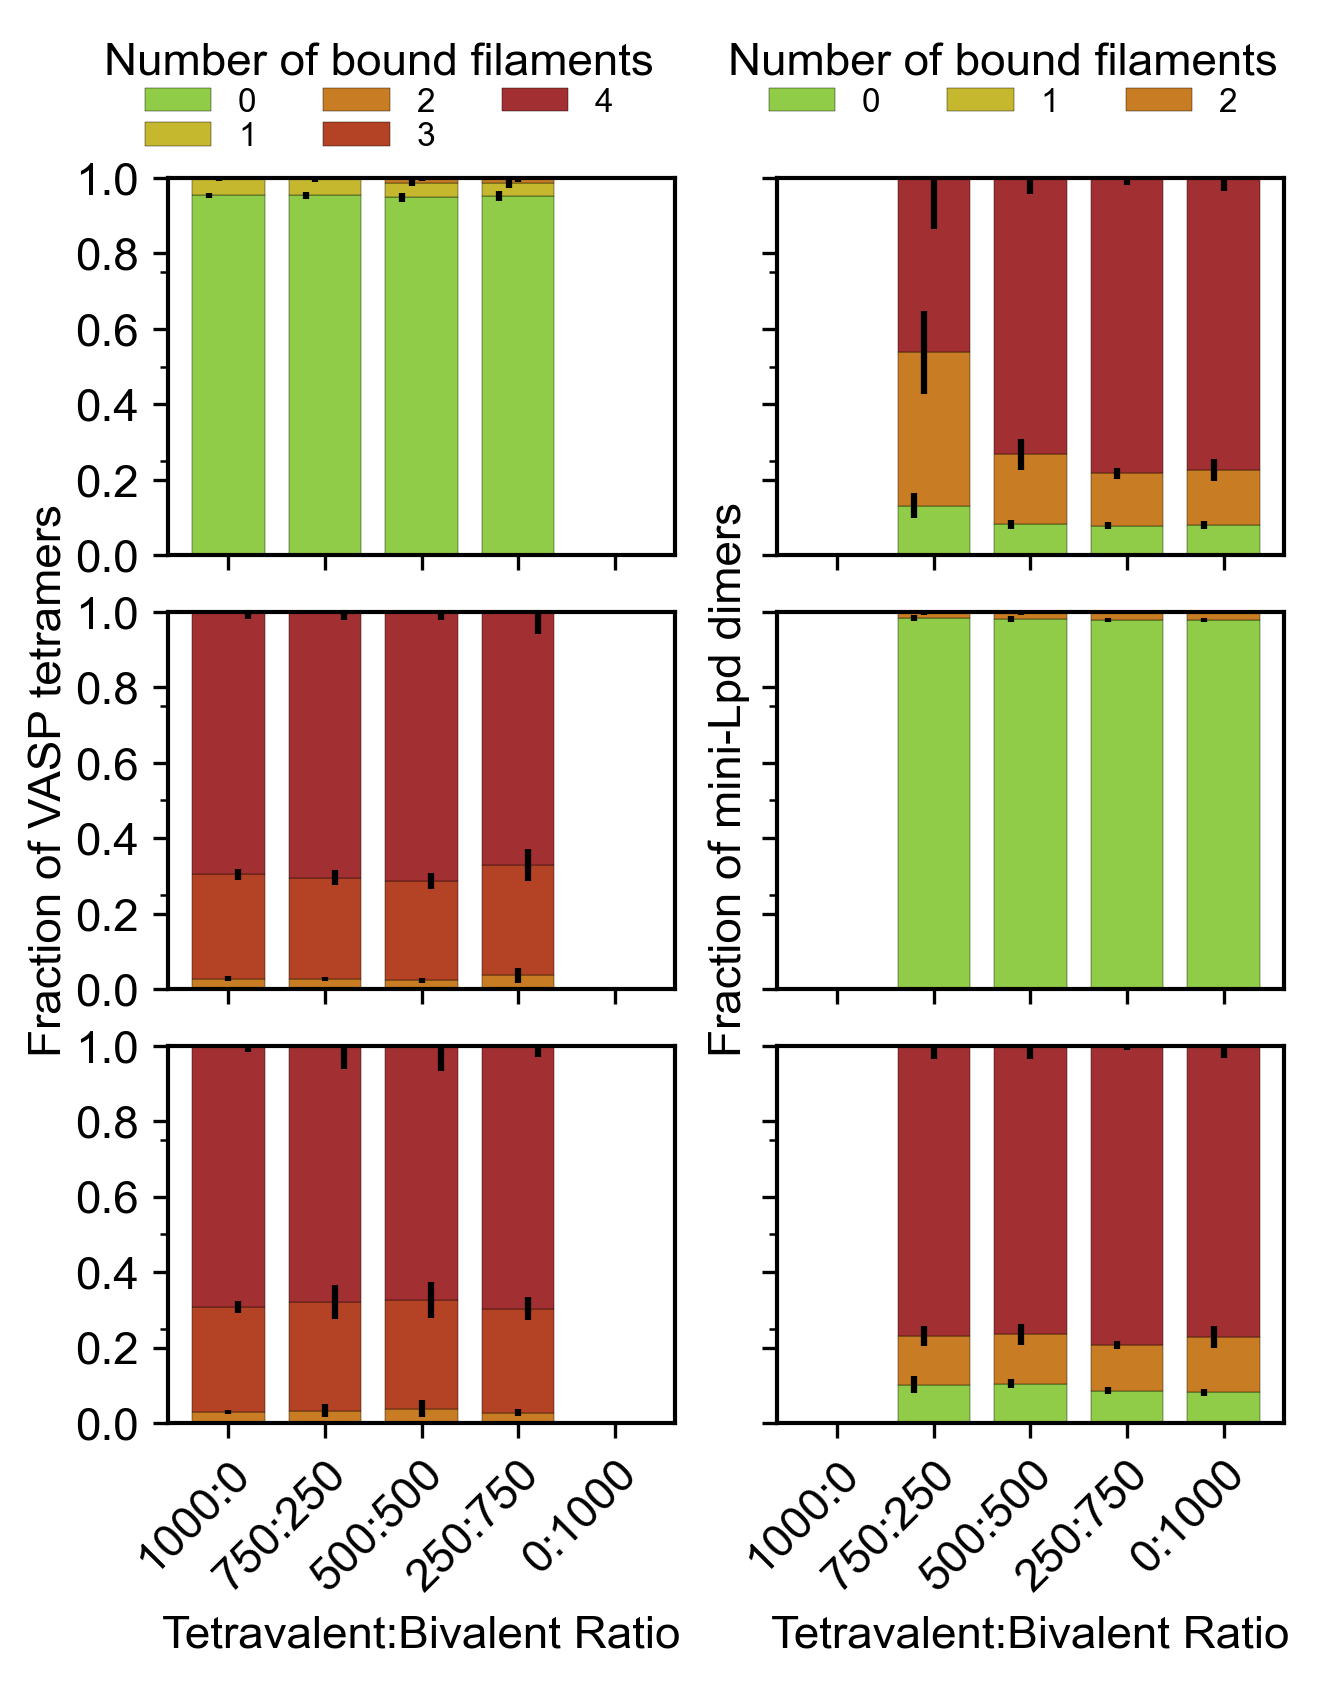

In [13]:
plt.rcParams.update({'font.size': 11, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#90CC47', '#D7B226', '#BA4820', "#a22f31"])
labelvec = ['1000:0', '750:250', '500:500', '250:750', '0:1000']
# Get figure
nr = len(kbindvec); nc = 2
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (4.0, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = True, sharey = True)
plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.2, 
                    hspace = 0.15)

# Figure S6C
for plotcounter in range(0, nr):
    legcell = []
    df2 = pd.DataFrame()
    print(df2)
    stddf2 = pd.DataFrame()
    stddatavec2 = []
    Nvalency = 4
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec2.append(np.array([val-0.2, cumarray2[0][Rval], tetravalent_Std_0_fil[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec2.append(np.array([val+offset, cumarray2[pos+1][Rval], tetravalent_Std_1_fil[Rval]]))
            elif pos == 1:
                stddatavec2.append(np.array([val+offset, cumarray2[pos+1][Rval], tetravalent_Std_2_fil[Rval]]))
            elif pos == 2:
                stddatavec2.append(np.array([val+offset, cumarray2[pos+1][Rval], tetravalent_Std_3_fil[Rval]]))
            elif pos == 3:
                stddatavec2.append(np.array([val+offset, cumarray2[pos+1][Rval], tetravalent_Std_4_fil[Rval]]))
            offset = offset + 0.1
    df2 = bardf2[bardf2["kbindt"] == kbindvec[plotcounter]].drop(columns = ["kbindt"])

    # Omit bar plot where there are 0 tetravalent crosslinkers due to trivial result
    df2.loc[df2['kunbindt'] == '0:1000', '0t'] = 0
    stddatavec2 = pd.DataFrame(np.array(stddatavec2), columns = ['x', 'mean', 'std'])

    # PLOT
    ax = axvec[nr-plotcounter-1][0]
    df2.plot(ax = ax, x = 'kunbindt', kind = 'bar', stacked = True, legend = False, 
            width = 0.75,
            cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec2['x'], stddatavec2['mean'], yerr = stddatavec2['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 45, ha = 'right', rotation_mode = 'anchor')
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
leg = fig.legend(['0', '1', '2', '3', '4'], title = 'Number of bound filaments', 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (0.48, 0.99), labelspacing = 0.1)

plt.figtext(-0.065, 0.3, 'Fraction of VASP tetramers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][0].set_xlabel(r"Tetravalent:Bivalent Ratio")

# Figure S6D
for plotcounter in range(0, nr):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 2 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], bivalent_Std_0_fil[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], bivalent_Std_1_fil[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], bivalent_Std_2_fil[Rval]]))
            offset = offset + 0.1
    df = bardf[bardf["kbindb"] == kbindvec[plotcounter]].drop(columns = ["kbindb"])
    
    # Omit bar plot where there are 0 bivalent crosslinkers due to trivial result
    df.loc[df['kunbindb'] == '1000:0', '0b'] = 0
    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1][1]
    df.plot(ax = ax, x = 'kunbindb', kind = 'bar', stacked = True, legend = False, 
            width = 0.75,
            cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 45, ha = 'right', rotation_mode = 'anchor')
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
leg = fig.legend(['0', '1', '2'], title = 'Number of bound filaments', 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (1.0, 0.99), labelspacing = 0.1)

plt.figtext(0.5, 0.3, 'Fraction of mini-Lpd dimers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][1].set_xlabel(r"Tetravalent:Bivalent Ratio") 

# SAVE FIGURE
plt.savefig('Figure_S6C-D.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S6C-D.pdf', bbox_inches = 'tight')


## Figure S6F Data

Actin-Covered Surface Area Fraction Time Series for Bivalent Crosslinkers

In [14]:
# Assemble data for figure

# Load all replicates
# Take mean and std
# Row 0 - Time
# Row 1 - fraction of occupied triangles 
jobfoldername = 'inputfiles' 
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2']
kbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
kunbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
labelvec = ['0.001', '0.01', '0.1', '1.0', '10.0'] 
Meanlist = []
Stdlist = []
mean_frac_bar = []
std_frac_bar = []
for diriter in range(0, 2):
    if diriter == 0:
        diroffset = 0
        dirpath = 'Figure_4-S6E-G/outputfiles/'
    else:
        diroffset = 5
        dirpath = 'Figure_4-S6E-G/outputfiles_2/'
    for koniter, kbind in enumerate(kbindvec):
        for koffiter, kunbind in enumerate (kunbindvec):
            bar_raw_data = np.array([])
            Row1 = []
            Rval = (koniter)*5+(koffiter)
            for repid in range(0+diroffset, 5+diroffset):
                fvar = dirpath+'FO_Output'+'/FO_'+jobfoldername+'_R_'+str(Rval)+'_r_'+str(repid-diroffset)+'.csv'
                df = pd.read_csv(fvar, index_col = 0)
                datavec = df.iloc[1].to_numpy()
                Row1.append(datavec)
                barstartpos = int(0.95*len(datavec))
                bar_raw_data = np.append(bar_raw_data, datavec[barstartpos:])
                print(diriter)
                print(diroffset)
                print(dirpath)
                print(repid)
                print('---')
            Row1 = np.array(Row1)
            Meanlist.append(np.mean(Row1, 0))
            Stdlist.append(np.std(Row1, 0))
            mean_frac_bar.append(np.mean(bar_raw_data))
            std_frac_bar.append(np.std(bar_raw_data))

Timevec = df.iloc[0].to_numpy()


0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4-S6E-G/outputfiles/
1
---
0
0
Figure_4-S6E-G/outputfiles/
2
---
0
0
Figure_4-S6E-G/outputfiles/
3
---
0
0
Figure_4-S6E-G/outputfiles/
4
---
0
0
Figure_4-S6E-G/outputfiles/
0
---
0
0
Figure_4

## Figure S6G Data

Fraction of Bivalent Crosslinkers Bound to 0, 1, or 2 Actin Filaments

In [15]:
# Function to Process Data

def crossplothelper(filename, Nreps, *args):
    if len(args):
        tv = args[0]
    # KEY
    # Row 0 Time
    # Row 1 Number of bound crosslinkers MEAN
    # Row 2 Number of bound crosslinkers STD
    # Row 3 Number of filaments per crosslinker MEAN
    # Row 4 Number of filaments per crosslinker STD
    # Row 5 Number of UNIQIUE filaments per crosslinker MEAN
    # Row 6 Number of UNIQUE filaments per crosslinker STD
    # Row 7 Last 5% data Row 5 MEAN
    # Row 8 Last 5% data Row 5 STD
    # Row 9 Number of crosslinkers bound to 1 filament MEAN
    # Row 10 Number of crosslinkers bound to 1 filament STD
    # Row 11 Number of crosslinkers bound to 2 filaments MEAN
    # Row 12 Number of crosslinkers bound to 2 filaments STD
    # Row 13 Number of crosslinkers bound to 3 filaments MEAN (Not Used for mini-Lpd)
    # Row 14 Number of crosslinkers bound to 3 filaments STD (Not Used for mini-Lpd)
    # Row 15 Number of crosslinkers bound to 4 filaments MEAN (Not Used for mini-Lpd)
    # Row 16 Number of crosslinkers bound to 4 filaments STD (Not Used for mini-Lpd)
    # Row 17 5% data Number of crosslinkers bound to N \in [1, 4] filaments MEAN
    # Row 18 5% data  Number of crosslinkers bound to N \in [1, 4] filaments STD
    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []
    Row4 = []
    Row5 = []
    Row6 = []
    Row7 = []
    Row8 = []
    Row17 = []
    Row18 = []
    bar_data_1 = np.array([])
    bar_data_2 = np.array([])
    for diriter in range(0, 2):
        if diriter == 0:
            diroffset = 0
            dirpath = 'Figure_4-S6E-G/outputfiles/'
        else:
            diroffset = 5
            dirpath = 'Figure_4-S6E-G/outputfiles_2/'
        for repid in range(0+diroffset, Nreps+diroffset):
            print(diriter)
            print(diroffset)
            print(dirpath)
            print('R_'+str(Rval)+'_r_'+str(repid))
            print('---')
            fvar = dirpath+filename+str(repid-diroffset)+'.csv'
            df = pd.read_csv(fvar, index_col = 0)
            
            Row1.append(df.iloc[1].to_numpy())
            Row2.append(df.iloc[2].to_numpy())
            Row3.append(df.iloc[3].to_numpy())
            Row4.append(df.iloc[4].to_numpy())
            Row5.append(df.iloc[5].to_numpy())
            Row6.append(df.iloc[6].to_numpy())
            Row7.append(df.iloc[7].to_numpy())
            Row8.append(df.iloc[8].to_numpy())
            Row9 = df.iloc[9].to_numpy()
            Row11 = df.iloc[11].to_numpy()
            startpos = int(0.95*len(Row9))
            endpos = int(len(Row9))
            bar_data_1 = np.append(bar_data_1, (Row9[startpos:endpos]/tv))
            bar_data_2 = np.append(bar_data_2, (Row11[startpos:endpos]/tv))
            Row17.append(df.iloc[17].to_numpy())
            Row18.append(df.iloc[18].to_numpy())
 
    # Get the number of crosslinkers that are free
    bar_data_0 = 1-bar_data_1-bar_data_2
    Mean_0_fil = np.mean(bar_data_0, 0)
    Mean_1_fil = np.mean(bar_data_1, 0)
    Mean_2_fil = np.mean(bar_data_2, 0)
    Std_0_fil = np.std(bar_data_0, 0)
    Std_1_fil = np.std(bar_data_1, 0)
    Std_2_fil = np.std(bar_data_2, 0)
    return [Mean_0_fil, Mean_1_fil, Mean_2_fil, Std_0_fil, Std_1_fil, Std_2_fil] 

############################################################################################

# Assemble data for figure

kbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
kunbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1] 
Mean_0_fil = []
Mean_1_fil = []
Mean_2_fil = []
Std_0_fil = []
Std_1_fil = []
Std_2_fil = []
jobfoldername = 'inputfiles' 
for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (kbinditer)*5+(kunbinditer) 
        filename = 'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, Nreps, 1000)
        Mean_0_fil.append(outputlist[0])
        Mean_1_fil.append(outputlist[1])
        Mean_2_fil.append(outputlist[2])
        Std_0_fil.append(outputlist[3]) 
        Std_1_fil.append(outputlist[4]) 
        Std_2_fil.append(outputlist[5]) 

kbindlist = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3,
             1e-2, 1e-2, 1e-2, 1e-2, 1e-2,
             1e-1, 1e-1, 1e-1, 1e-1, 1e-1,
             1e+0, 1e+0, 1e+0, 1e+0, 1e+0,
             1e+1, 1e+1, 1e+1, 1e+1, 1e+1]
kunbindlist = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        '0':Mean_0_fil, '1':Mean_1_fil,
                        '2':Mean_2_fil}) 
cumarray = np.zeros((10, len(Mean_0_fil))) 
cumarray[0][:] = Mean_0_fil[:]
cumarray[1][:] = cumarray[0][:]+Mean_1_fil
cumarray[2][:] = cumarray[1][:]+Mean_2_fil
stddf = pd.DataFrame({})


0
0
Figure_4-S6E-G/outputfiles/
R_0_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_0_r_1
---
0
0
Figure_4-S6E-G/outputfiles/
R_0_r_2
---
0
0
Figure_4-S6E-G/outputfiles/
R_0_r_3
---
0
0
Figure_4-S6E-G/outputfiles/
R_0_r_4
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_0_r_5
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_0_r_6
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_0_r_7
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_0_r_8
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_0_r_9
---
0
0
Figure_4-S6E-G/outputfiles/
R_1_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_1_r_1
---
0
0
Figure_4-S6E-G/outputfiles/
R_1_r_2
---
0
0
Figure_4-S6E-G/outputfiles/
R_1_r_3
---
0
0
Figure_4-S6E-G/outputfiles/
R_1_r_4
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_1_r_5
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_1_r_6
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_1_r_7
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_1_r_8
---
1
5
Figure_4-S6E-G/outputfiles_2/
R_1_r_9
---
0
0
Figure_4-S6E-G/outputfiles/
R_2_r_0
---
0
0
Figure_4-S6E-G/outputfiles/
R_2_r_1
---
0
0
Figure_4

## Plot Figure S6F-G

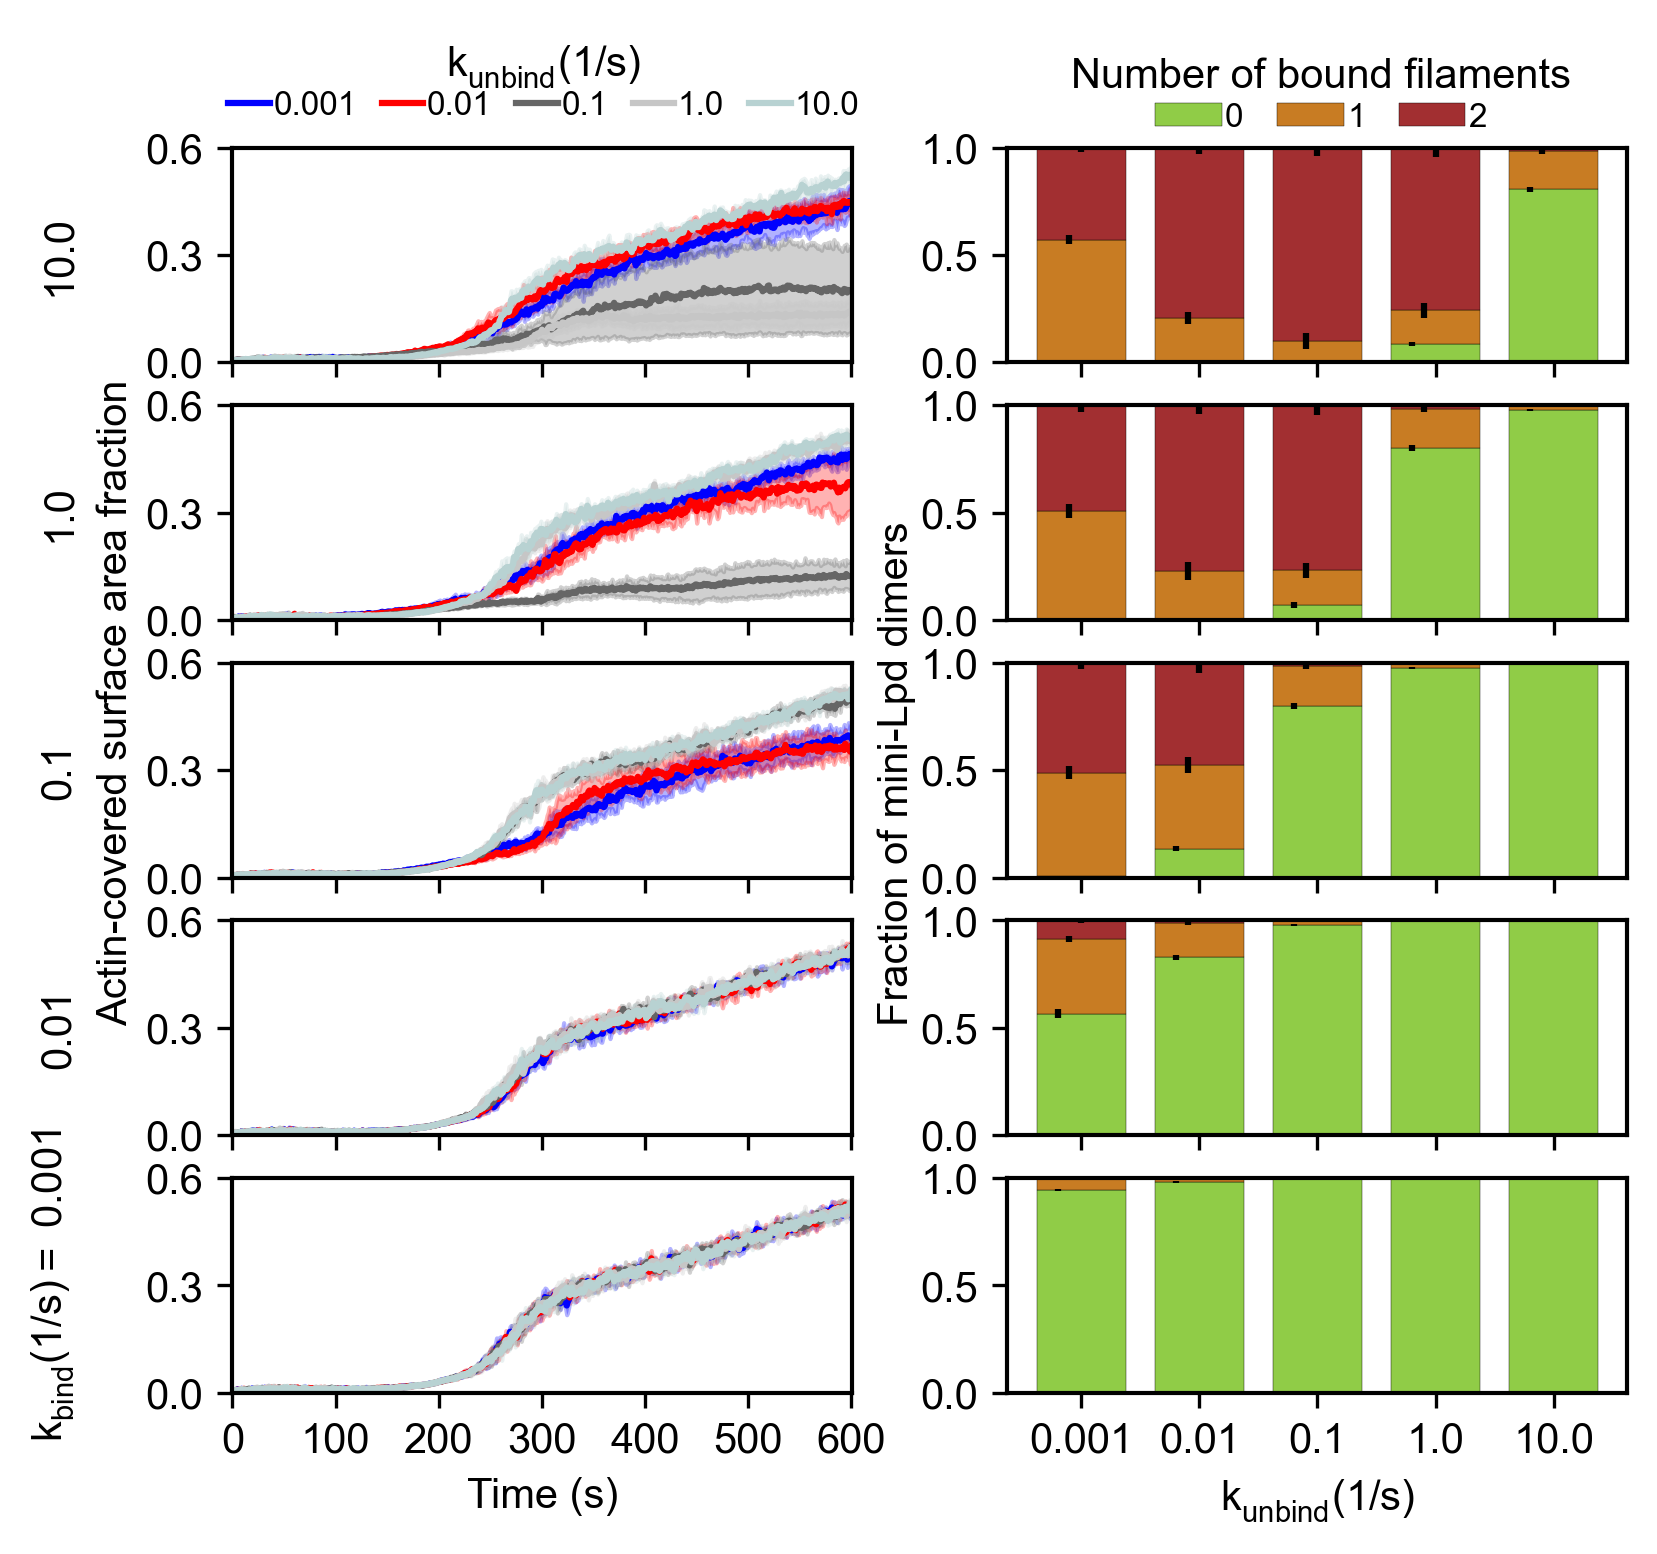

In [16]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#90CC47', '#D7B226', '#BA4820', "#a22f31"])
labelvec = ['0.001', '0.01', '0.1', '1.0', '10.0'] 
ylabelvec = [0.2, 0.4, 0.8, 1.0, 2.0]
# Get figure
nr = 5; nc = 2 
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (5.0, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = False)

# Figure S6G
for plotcounter in range(0, nr):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 2 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], Std_0_fil[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_1_fil[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_2_fil[Rval]]))
            offset = offset + 0.1
    df = bardf[bardf["kbind"] == kbindvec[plotcounter]].drop(columns = "kbind")
    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1][1]
    df.plot(ax = ax, x = 'kunbind', kind = 'bar', stacked = True, legend = False, 
            width = 0.75,
            cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.5, 1.0])
    if plotcounter > 0:
        ax.set_xticklabels([])
leg = fig.legend(['0', '1', '2'], title = 'Number of bound filaments', 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (0.9625, 0.96), 
                 labelspacing = 0.2, columnspacing = 1.0, handletextpad = 0.1) 

plt.figtext(0.48, 0.3, 'Fraction of mini-Lpd dimers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][1].set_xlabel(r"$k_{unbind} (1/s)$")
axvec[1][1].set_xlabel('')
axvec[0][1].set_xlabel('')

# Figure S6F
for plotcounter in range(0, nr):
    legcell = []
    for val in range(0, nr):
        Rval = plotcounter*len(kunbindvec) + val
        ax = axvec[nr-plotcounter-1][0]
        x = ax.plot(Timevec, Meanlist[Rval], color = colorlist[val])
        legcell.append(x[0]);
        ax.fill_between(Timevec, Meanlist[Rval]-Stdlist[Rval], Meanlist[Rval]+Stdlist[Rval], 
                        color = colorlist[val], alpha = 0.3)
        ax.set_xlim([0, 601])
        ax.set_ylim([0, 0.6])
        ax.set_yticks([0, 0.3, 0.6])
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
        if plotcounter > 0:
            ax.set_xticklabels([])
plt.text(-0.04, 0.3,  'Actin-covered surface area fraction', transform = plt.gcf().transFigure, rotation = 90)

leg = fig.legend(legcell, kunbindvec, title = r"$k_{unbind} (1/s)$", 
                 ncol = 5, fontsize = 8, frameon = False, bbox_to_anchor = (0.4875, 0.97), 
                 labelspacing = 0.0, columnspacing = 0.75, handletextpad = 0.1, handlelength = 1.25) 

axvec[4][0].set_xlabel('Time (s)') 
axvec[0][0].set_ylabel('10.0') 
axvec[0][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[1][0].set_ylabel('1.0') 
axvec[1][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[2][0].set_ylabel('0.1') 
axvec[2][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[3][0].set_ylabel('0.01') 
axvec[3][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[4][0].set_ylabel(r"$k_{bind} (1/s) =$ 0.001") 
axvec[4][0].yaxis.set_label_coords(-0.25, 0.5)

plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.25, 
                    hspace = 0.2)

# SAVE FIGURE
plt.savefig('Figure_S6F-G', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S6F-G.pdf', bbox_inches = 'tight')


# Figure S7

## Figure S7D Data

Actin-Covered Surface Area Fraction Time Series for Dynamic Multimerization

In [17]:
# Assemble data for figure

# Load all replicates
# Take mean and std
# Row 0 - Time
# Row 1 - fraction of occupied triangles 
jobfoldername = 'inputfiles'
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2'] 
Meanlist = []
Stdlist = []
mean_frac_bar = []
std_frac_bar = []
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
dirpath = 'Figure_S7/Figure_S7B-F/'
for koniter, kbind in enumerate(kbindvec):
    for koffiter, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = koniter*len(kunbindvec)+koffiter
        for repid in range(0, 5):
            fvar = dirpath+'outputfiles/'+'FO_Output'+'/FO_'+jobfoldername+'_R_'+str(Rval)+'_r_'+str(repid)+'.csv'
            df = pd.read_csv(fvar, index_col = 0)
            datavec = df.iloc[1].to_numpy()
            Row1.append(datavec)
            barstartpos = int(0.95*len(datavec))
            bar_raw_data = np.append(bar_raw_data, datavec[barstartpos:])
            print(Rval)
            print(repid)
            print('---')
        Row1 = np.array(Row1)
        Meanlist.append(np.mean(Row1, 0))
        Stdlist.append(np.std(Row1, 0))
        mean_frac_bar.append(np.mean(bar_raw_data))
        std_frac_bar.append(np.std(bar_raw_data))

Timevec = df.iloc[0].to_numpy()


0
0
---
0
1
---
0
2
---
0
3
---
0
4
---
1
0
---
1
1
---
1
2
---
1
3
---
1
4
---
2
0
---
2
1
---
2
2
---
2
3
---
2
4
---
3
0
---
3
1
---
3
2
---
3
3
---
3
4
---
4
0
---
4
1
---
4
2
---
4
3
---
4
4
---
5
0
---
5
1
---
5
2
---
5
3
---
5
4
---
6
0
---
6
1
---
6
2
---
6
3
---
6
4
---
7
0
---
7
1
---
7
2
---
7
3
---
7
4
---
8
0
---
8
1
---
8
2
---
8
3
---
8
4
---
9
0
---
9
1
---
9
2
---
9
3
---
9
4
---
10
0
---
10
1
---
10
2
---
10
3
---
10
4
---
11
0
---
11
1
---
11
2
---
11
3
---
11
4
---
12
0
---
12
1
---
12
2
---
12
3
---
12
4
---
13
0
---
13
1
---
13
2
---
13
3
---
13
4
---
14
0
---
14
1
---
14
2
---
14
3
---
14
4
---
15
0
---
15
1
---
15
2
---
15
3
---
15
4
---
16
0
---
16
1
---
16
2
---
16
3
---
16
4
---
17
0
---
17
1
---
17
2
---
17
3
---
17
4
---
18
0
---
18
1
---
18
2
---
18
3
---
18
4
---
19
0
---
19
1
---
19
2
---
19
3
---
19
4
---
20
0
---
20
1
---
20
2
---
20
3
---
20
4
---
21
0
---
21
1
---
21
2
---
21
3
---
21
4
---
22
0
---
22
1
---
22
2
---
22
3
---
22
4
---
23
0
---
23
1
-

## Figure S7E-F Data

E: Fraction of Monomeric Units in Various Monomer-Monomer and Monomer-Actin Binding States

F: Distribution of Multimer Lengths for Systems With Actin Filaments

In [18]:
# Function to Process Data

def crossplothelper(filename, filename_2, Nreps, *args):
    if len(args):
        tv = (args[0])
        print(tv)
    # KEY
    # Row 0 Time
    # Row 1 Bound Monomer 0
    # Row 2 Bound Monomer 1
    # Row 3 Bound Monomer 2
    # Row 4 Free Monomer 0
    # Row 5 Free Monomer 1
    # Row 6 Free Monomer 2

    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []

    Row4 = []
    Row5 = []
    Row6 = []

    bar_data_bm0 = np.array([])
    bar_data_bm1 = np.array([])
    bar_data_bm2 = np.array([])

    bar_data_fm0 = np.array([])
    bar_data_fm1 = np.array([])
    bar_data_fm2 = np.array([])

    length_df_list = []
    length_df_counts_list = []

    dirpath = 'Figure_S7/Figure_S7B-F/'
    for repid in range(0, Nreps):
        print('R_'+str(Rval)+'_r_'+str(repid))
        print('---')
        fvar = dirpath+filename+str(repid)+'.csv'
        df = pd.read_csv(fvar, index_col = 0)
        Row1.append(df.iloc[1].to_numpy())
        Row2.append(df.iloc[2].to_numpy())
        Row3.append(df.iloc[3].to_numpy())

        Row4.append(df.iloc[4].to_numpy())
        Row5.append(df.iloc[5].to_numpy())
        Row6.append(df.iloc[6].to_numpy())
            
        Row1temp = [number/tv for number in Row1]
        Row2temp = [number/tv for number in Row2]
        Row3temp = [number/tv for number in Row3]

        Row4temp = [number/tv for number in Row4]
        Row5temp = [number/tv for number in Row5]
        Row6temp = [number/tv for number in Row6]

        startpos = int(0.95*len(Row1))
        endpos = int(len(Row1))

        bar_data_bm0 = np.append(bar_data_bm0, (Row1temp[startpos:endpos]))
        bar_data_bm1 = np.append(bar_data_bm1, (Row2temp[startpos:endpos]))
        bar_data_bm2 = np.append(bar_data_bm2, (Row3temp[startpos:endpos]))

        bar_data_fm0 = np.append(bar_data_fm0, (Row4temp[startpos:endpos]))
        bar_data_fm1 = np.append(bar_data_fm1, (Row5temp[startpos:endpos]))
        bar_data_fm2 = np.append(bar_data_fm2, (Row6temp[startpos:endpos]))

        fvar2 = dirpath+filename_2+str(repid)+'.csv'
        df2 = pd.read_csv(fvar2, index_col = 0)
        length_monomers = df2.mul(df2.index, axis = 0)
            
        col_sums = length_monomers.sum(axis = 0)
        length_1_values = tv - col_sums
        length_monomers.loc[1] = length_1_values
        length_monomers = length_monomers.sort_index()

        length_df_counts_tmp = length_monomers.iloc[:, -30:]
        length_df_counts_list.append(length_df_counts_tmp)

        length_df_tmp = length_monomers.iloc[:, -30:]
        length_df_tmp = length_df_tmp/tv
        length_df_list.append(length_df_tmp)
            
    Mean_bar_data_bm0 = np.mean(bar_data_bm0, 0)
    Mean_bar_data_bm1 = np.mean(bar_data_bm1, 0)
    Mean_bar_data_bm2 = np.mean(bar_data_bm2, 0)

    Mean_bar_data_fm0 = np.mean(bar_data_fm0, 0)
    Mean_bar_data_fm1 = np.mean(bar_data_fm1, 0)
    Mean_bar_data_fm2 = np.mean(bar_data_fm2, 0)

    Std_bar_data_bm0 = np.std(bar_data_bm0, 0)
    Std_bar_data_bm1 = np.std(bar_data_bm1, 0)
    Std_bar_data_bm2 = np.std(bar_data_bm2, 0)

    Std_bar_data_fm0 = np.std(bar_data_fm0, 0)
    Std_bar_data_fm1 = np.std(bar_data_fm1, 0)
    Std_bar_data_fm2 = np.std(bar_data_fm2, 0)

    # Determine the union of all indices
    all_indices = sorted(set().union(*(df.index for df in length_df_list)))

    # Reindex all DataFrames using the union of indices
    df_list_reindexed = [df.reindex(all_indices, fill_value = 0) for df in length_df_list]

    length_df = pd.concat(df_list_reindexed, axis = 1)
    length_df.dropna(how = 'all', inplace = True)
    Mean_length_df = length_df.mean(axis = 1)
    Mean_length_data = Mean_length_df.values
    Std_length_df = length_df.std(axis = 1)
    Std_length_data = Std_length_df.values
    Lengthvec = length_df.index.to_list()

    all_indices_counts = sorted(set().union(*(df.index for df in length_df_counts_list)))
    df_list_counts_reindexed = [df.reindex(all_indices_counts, fill_value = 0) for df in length_df_counts_list]
    length_counts_df = pd.concat(df_list_counts_reindexed, axis = 1)
    length_counts_df.dropna(how = 'all', inplace = True)
    length_counts = length_counts_df.sum(axis = 1)

    return [Mean_bar_data_bm0, Mean_bar_data_bm1, Mean_bar_data_bm2, Mean_bar_data_fm0, Mean_bar_data_fm1, Mean_bar_data_fm2, 
            Std_bar_data_bm0, Std_bar_data_bm1, Std_bar_data_bm2, Std_bar_data_fm0, Std_bar_data_fm1, Std_bar_data_fm2, 
            Mean_length_data, Std_length_data, Lengthvec, length_counts]

############################################################################################

# Assemble data for figure

kbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1]
kunbindvec = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

Mean_bar_data_bm0 = []
Mean_bar_data_bm1 = []
Mean_bar_data_bm2 = []

Mean_bar_data_fm0 = []
Mean_bar_data_fm1 = []
Mean_bar_data_fm2 = []

Std_bar_data_bm0 = []
Std_bar_data_bm1 = []
Std_bar_data_bm2 = []

Std_bar_data_fm0 = []
Std_bar_data_fm1 = []
Std_bar_data_fm2 = []

Mean_length_data = []
Std_length_data = []
Lengthvec_data = []
Lengthcounts_data = []

jobfoldername = 'inputfiles' 

for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (kbinditer)*len(kunbindvec)+(4-kunbinditer)
        filename = 'outputfiles/'+'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        filename_2 = 'outputfiles/'+'CrosslinkOutput/'+'Length_Freq_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, filename_2, Nreps, 2000)

        Mean_bar_data_bm0.append(outputlist[0])
        Mean_bar_data_bm1.append(outputlist[1])
        Mean_bar_data_bm2.append(outputlist[2])

        Mean_bar_data_fm0.append(outputlist[3])
        Mean_bar_data_fm1.append(outputlist[4])
        Mean_bar_data_fm2.append(outputlist[5])

        Std_bar_data_bm0.append(outputlist[6])
        Std_bar_data_bm1.append(outputlist[7])
        Std_bar_data_bm2.append(outputlist[8])

        Std_bar_data_fm0.append(outputlist[9])
        Std_bar_data_fm1.append(outputlist[10])
        Std_bar_data_fm2.append(outputlist[11])

        Mean_length_data.append(outputlist[12])
        Std_length_data.append(outputlist[13])
        Lengthvec_data.append(outputlist[14])
        Lengthcounts_data.append(outputlist[15])

kbindlist = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3,
             1e-2, 1e-2, 1e-2, 1e-2, 1e-2,
             1e-1, 1e-1, 1e-1, 1e-1, 1e-1,
             1e+0, 1e+0, 1e+0, 1e+0, 1e+0,
             1e+1, 1e+1, 1e+1, 1e+1, 1e+1]
kunbindlist = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        'FM0':Mean_bar_data_fm0, 'BM0':Mean_bar_data_bm0,
                        'FM1':Mean_bar_data_fm1, 'BM1':Mean_bar_data_bm1,
                        'FM2':Mean_bar_data_fm2, 'BM2':Mean_bar_data_bm2}) 

cumarray = np.zeros((6, len(Mean_bar_data_bm2)))
cumarray[0][:] = Mean_bar_data_fm0[:]
cumarray[1][:] = cumarray[0][:]+Mean_bar_data_bm0
cumarray[2][:] = cumarray[1][:]+Mean_bar_data_fm1
cumarray[3][:] = cumarray[2][:]+Mean_bar_data_bm1
cumarray[4][:] = cumarray[3][:]+Mean_bar_data_fm2
cumarray[5][:] = cumarray[4][:]+Mean_bar_data_bm2

stddf = pd.DataFrame({})
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2']
Meanlist_2 = Mean_length_data
Stdlist_2 = Std_length_data
Lengthvec = Lengthvec_data
Lengthcounts = Lengthcounts_data


2000
R_4_r_0
---
R_4_r_1
---
R_4_r_2
---
R_4_r_3
---
R_4_r_4
---
2000
R_3_r_0
---
R_3_r_1
---
R_3_r_2
---
R_3_r_3
---
R_3_r_4
---
2000
R_2_r_0
---
R_2_r_1
---
R_2_r_2
---
R_2_r_3
---
R_2_r_4
---
2000
R_1_r_0
---
R_1_r_1
---
R_1_r_2
---
R_1_r_3
---
R_1_r_4
---
2000
R_0_r_0
---
R_0_r_1
---
R_0_r_2
---
R_0_r_3
---
R_0_r_4
---
2000
R_9_r_0
---
R_9_r_1
---
R_9_r_2
---
R_9_r_3
---
R_9_r_4
---
2000
R_8_r_0
---
R_8_r_1
---
R_8_r_2
---
R_8_r_3
---
R_8_r_4
---
2000
R_7_r_0
---
R_7_r_1
---
R_7_r_2
---
R_7_r_3
---
R_7_r_4
---
2000
R_6_r_0
---
R_6_r_1
---
R_6_r_2
---
R_6_r_3
---
R_6_r_4
---
2000
R_5_r_0
---
R_5_r_1
---
R_5_r_2
---
R_5_r_3
---
R_5_r_4
---
2000
R_14_r_0
---
R_14_r_1
---
R_14_r_2
---
R_14_r_3
---
R_14_r_4
---
2000
R_13_r_0
---
R_13_r_1
---
R_13_r_2
---
R_13_r_3
---
R_13_r_4
---
2000
R_12_r_0
---
R_12_r_1
---
R_12_r_2
---
R_12_r_3
---
R_12_r_4
---
2000
R_11_r_0
---
R_11_r_1
---
R_11_r_2
---
R_11_r_3
---
R_11_r_4
---
2000
R_10_r_0
---
R_10_r_1
---
R_10_r_2
---
R_10_r_3
---
R_10_r_4
---


## Plot Figure S7D-E

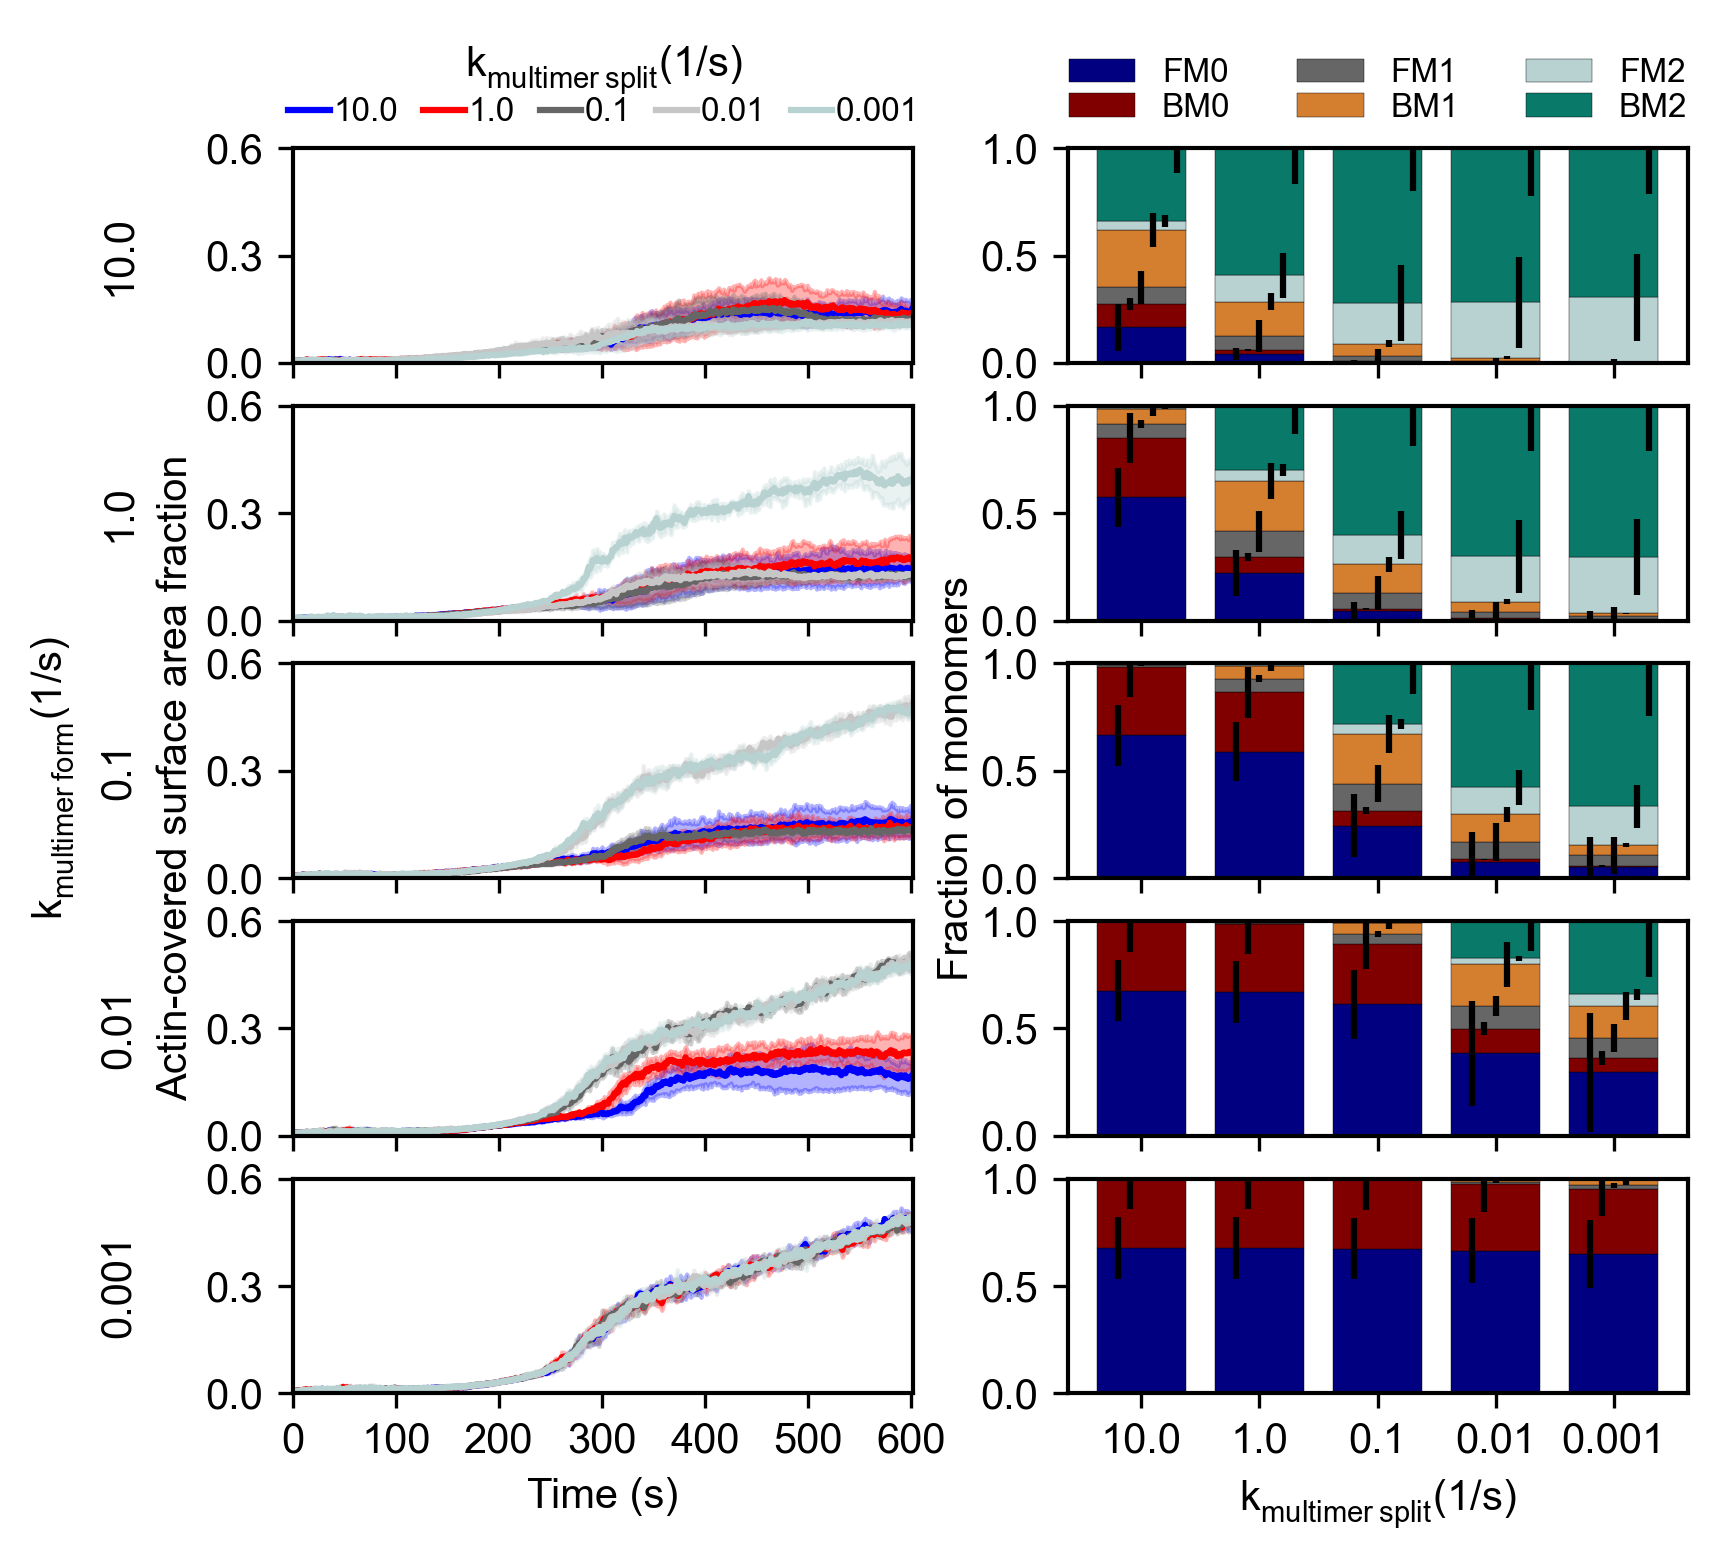

In [19]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#d47e30', '#B8D2D2', '#097969'])
labelvec = ['10.0', '1.0', '0.1', '0.01', '0.001']
# Get figure
nr = len(kbindvec); nc = 2
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (5.0, 5.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = False)
plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.2, 
                    hspace = 0.15)

# Figure S7E
for plotcounter in range(0, nr):
    legcell = []
    df = pd.DataFrame()
    stddf = pd.DataFrame()
    stddatavec = []
    Nvalency = 6 
    for val in range(0, len(kunbindvec)):
        Rval = plotcounter*len(kunbindvec)+val
        stddatavec.append(np.array([val-0.2, cumarray[0][Rval], Std_bar_data_fm0[Rval]]))
        offset = -0.1
        for pos in range(0, Nvalency):
            if pos == 0:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_bm0[Rval]]))
            elif pos == 1:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_fm1[Rval]]))
            elif pos == 2:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_bm1[Rval]]))
            elif pos == 3:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_fm2[Rval]]))
            elif pos == 4:
                stddatavec.append(np.array([val+offset, cumarray[pos+1][Rval], Std_bar_data_bm2[Rval]]))
            offset = offset + 0.1
    df =bardf[bardf["kbind"] == kbindvec[plotcounter]].drop(columns = "kbind")
    stddatavec = pd.DataFrame(np.array(stddatavec), columns = ['x', 'mean', 'std'])
    
    # PLOT
    ax = axvec[nr-plotcounter-1][1]
    df.plot(ax = ax, x = 'kunbind', kind = 'bar', stacked = True, legend = False, 
            width = 0.75,
            cmap = new_cmap, edgecolor = "black", linewidth = 0.1)
    ax.errorbar(stddatavec['x'], stddatavec['mean'], yerr = stddatavec['std'], 
                fmt = 'o', markersize = 0, ecolor = 'black')
    
    # Beautify
    ax.set_xticklabels(labelvec, rotation = 0)
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0, 0.5, 1.0])

    if plotcounter > 0:
            ax.set_xticklabels([])

leg = fig.legend(['FM0', 'BM0', 'FM1', 'BM1', 'FM2', 'BM2'], 
                 ncol = 3, fontsize = 8, frameon = False, bbox_to_anchor = (1.0, 0.96), labelspacing = 0.1)

plt.figtext(0.48, 0.33, 'Fraction of monomers', transform = plt.gcf().transFigure, rotation = 90)
axvec[nr-1][1].set_xlabel(r"$k_{multimer\:split} (1/s)$")

# Figure S7D
for plotcounter in range(0, nr):
    legcell = []
    for val in range(0, 5):
        Rval = plotcounter*len(kunbindvec) + val
        ax = axvec[nr-plotcounter-1][0]
        x = ax.plot(Timevec, Meanlist[Rval], color = colorlist[val])
        legcell.append(x[0]);
        ax.fill_between(Timevec, Meanlist[Rval]-Stdlist[Rval], Meanlist[Rval]+Stdlist[Rval], 
                        color = colorlist[val], alpha = 0.3)
        ax.set_xlim([0, 601])
        ax.set_ylim([0, 0.6])
        ax.set_yticks([0, 0.3, 0.6])
        ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
        if plotcounter > 0:
            ax.set_xticklabels([])
plt.text(-0.04, 0.25,  'Actin-covered surface area fraction', transform = plt.gcf().transFigure, rotation = 90)
leg = fig.legend(legcell, labelvec, title = r"$k_{multimer\:split} (1/s)$", 
                 ncol = 5, fontsize = 8, frameon = False, bbox_to_anchor = (0.4875, 0.97), 
                 labelspacing = 0.0, columnspacing = 0.75, handletextpad = 0.1, handlelength = 1.25) 

axvec[4][0].set_xlabel('Time (s)') 
axvec[0][1].set_xlabel('')
axvec[1][1].set_xlabel('')
axvec[2][1].set_xlabel('')
axvec[3][1].set_xlabel('')

axvec[0][0].set_ylabel('10.0') 
axvec[0][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[1][0].set_ylabel('1.0') 
axvec[1][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[2][0].set_ylabel('0.1') 
axvec[2][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[3][0].set_ylabel('0.01') 
axvec[3][0].yaxis.set_label_coords(-0.25, 0.5)
axvec[4][0].set_ylabel('0.001') 
plt.text(-0.125, 0.375,  r"$k_{multimer\:form} (1/s)$", transform = plt.gcf().transFigure, rotation = 90)
axvec[4][0].yaxis.set_label_coords(-0.25, 0.5)

plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.25, 
                    hspace = 0.2)

# SAVE FIGURE
plt.savefig('Figure_S7D-E.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S7D-E.pdf', bbox_inches = 'tight')


## Plot Figure S7F

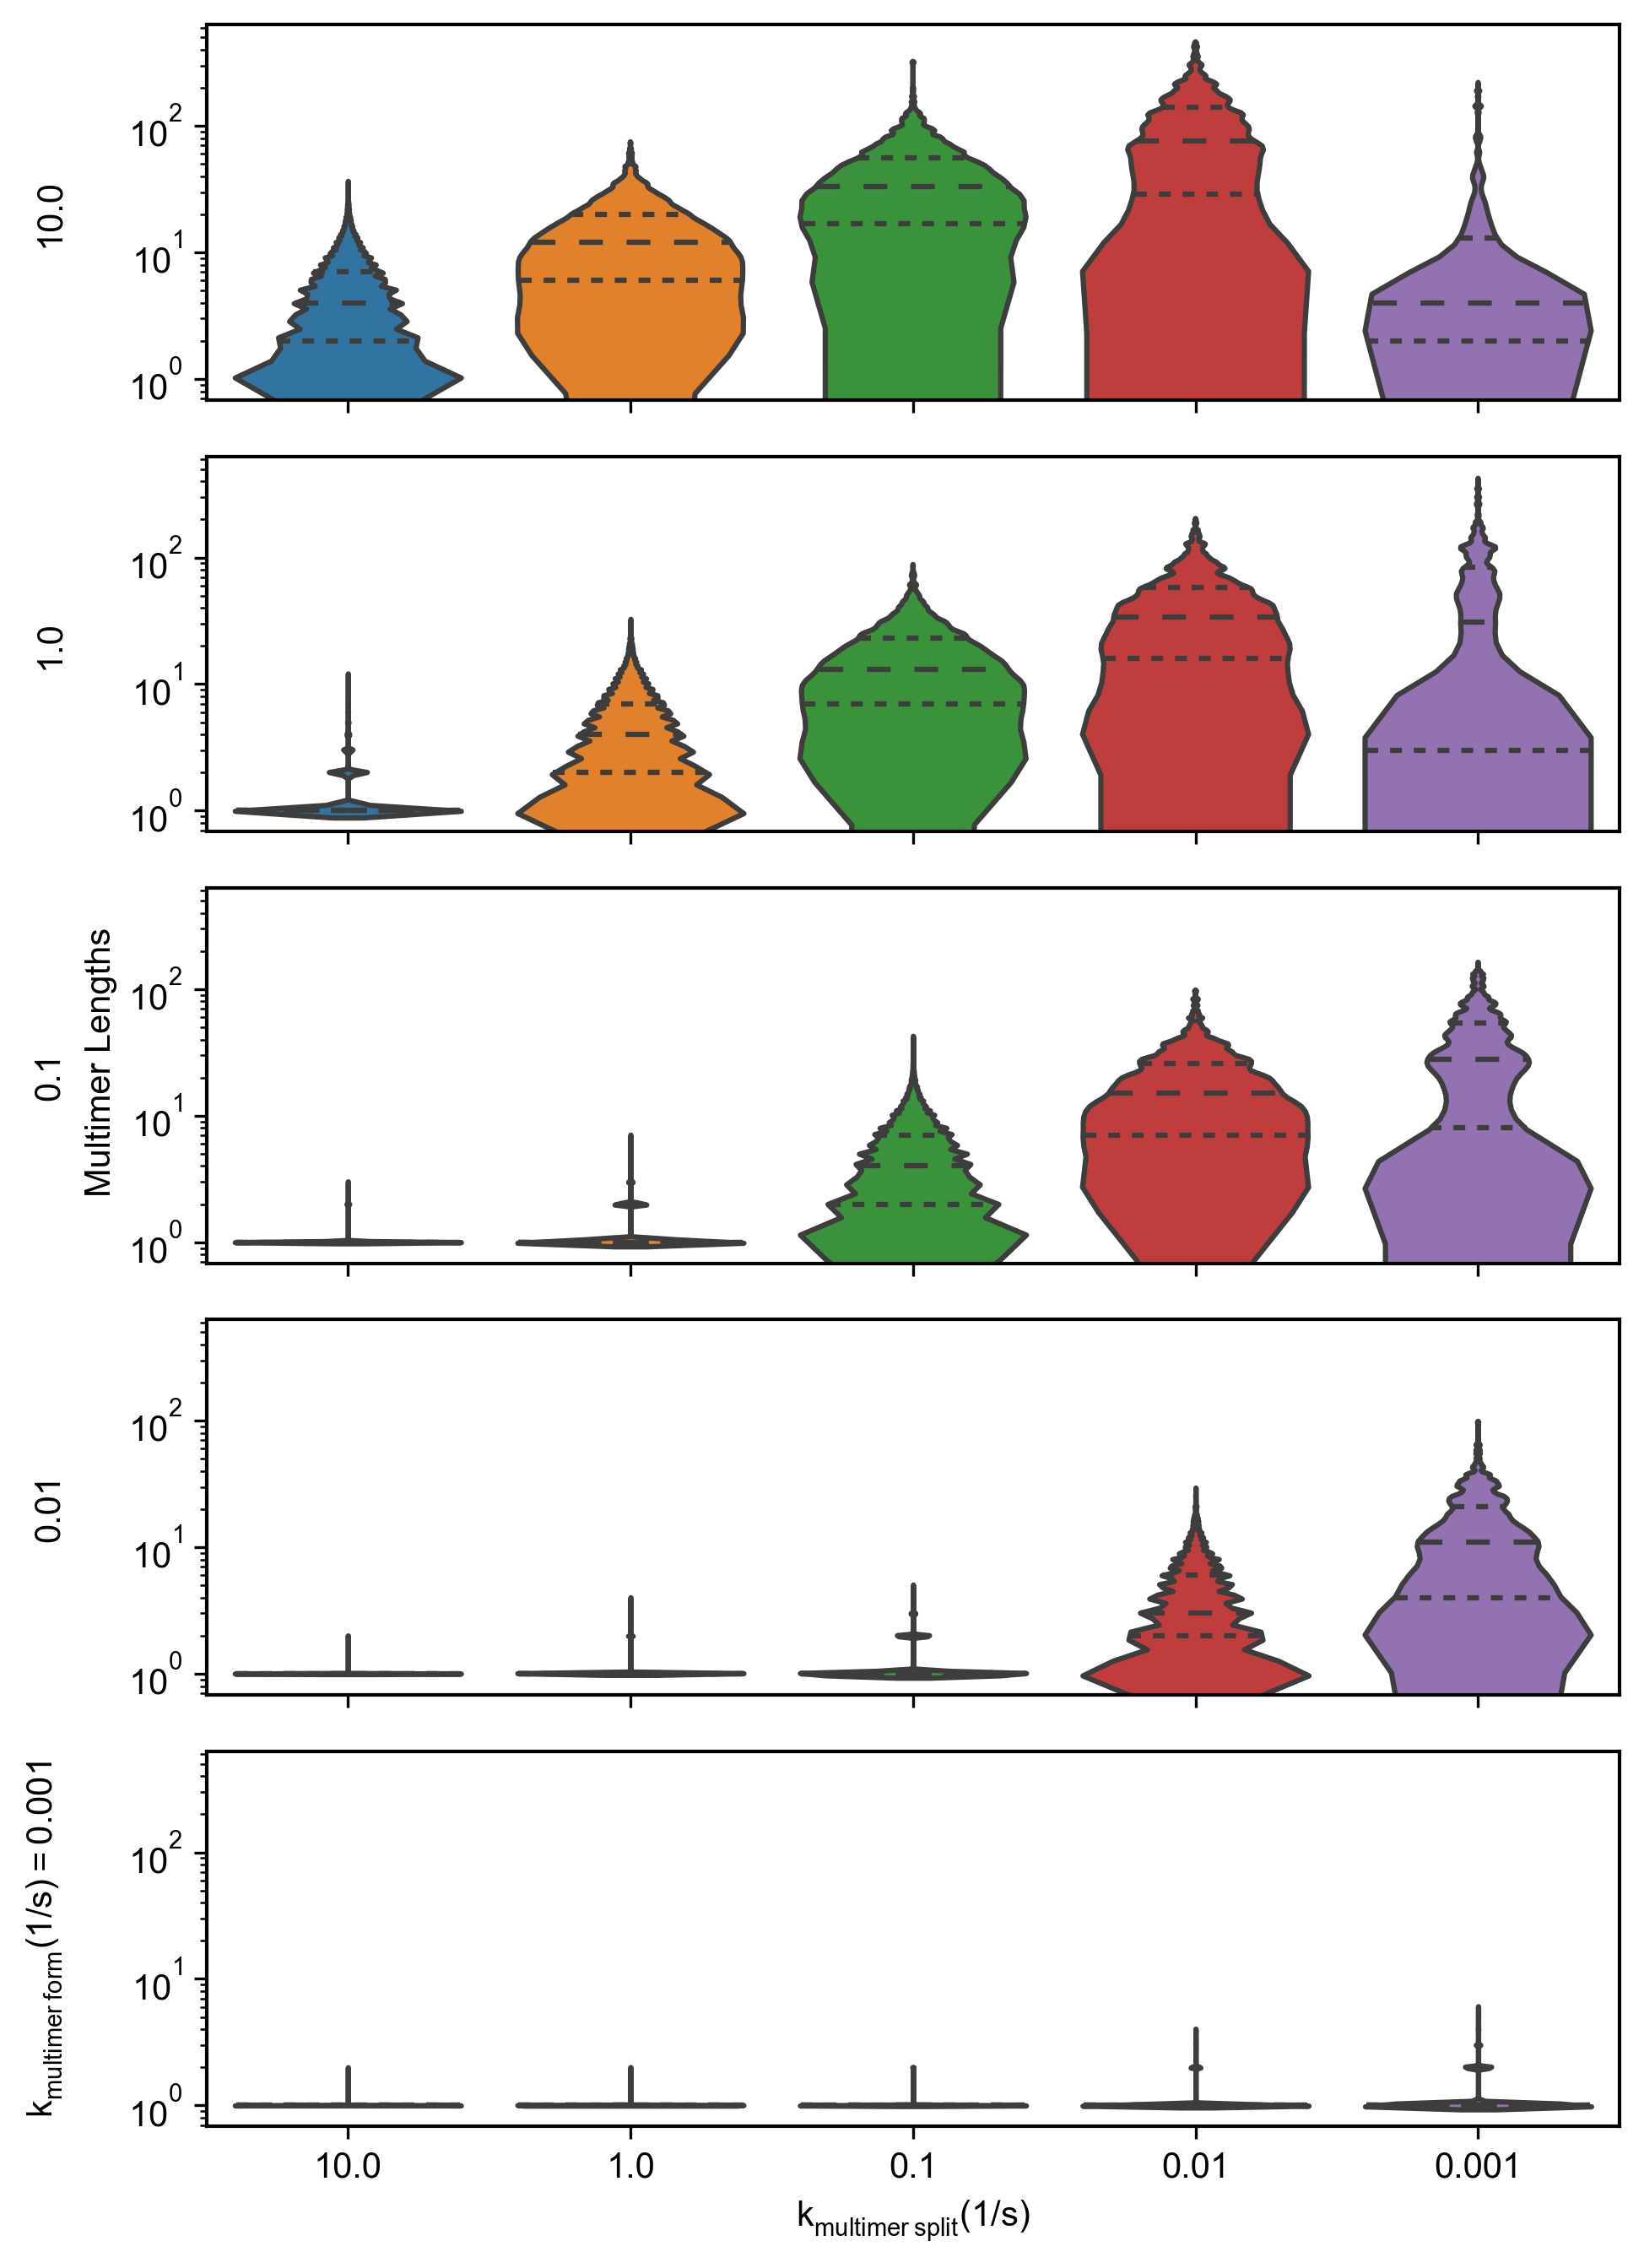

In [20]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#d47e30', '#B8D2D2', '#097969'])
labelvec = ['10.0', '1.0', '0.1', '0.01', '0.001']
ylabelvec = [0.2, 0.4, 0.8, 1.0, 2.0]
# Get figure
nr = len(kbindvec); nc = 1 
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (6.0, 10.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = True)
plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.2, 
                    hspace = 0.15)

for plotcounter in range(0, nr):
    legcell = []
    bplot_data = []
    for val in range(0, 5):
        Rval = plotcounter*len(kunbindvec) + val
        length = Lengthcounts[Rval].index.to_list()
        freq = Lengthcounts[Rval].values
        bplot_data.append(np.repeat(length, freq))
    ax = axvec[nr-plotcounter-1]
    bplot = sns.violinplot(data = [bplot_data[0], bplot_data[1], bplot_data[2], bplot_data[3], bplot_data[4]], 
                           inner = 'quartile', ax = ax, log_scale = True, scale = 'width')
    plt.yscale('log')
    if plotcounter > 0:
        ax.set_xticklabels([])

    if plotcounter == 0:
        ax.set_xticklabels(['10.0', '1.0', '0.1', '0.01', '0.001'])
plt.text(-0.03, 0.42,  'Multimer Lengths', transform = plt.gcf().transFigure, rotation = 90)

axvec[0].set_ylabel('10.0') 
axvec[0].yaxis.set_label_coords(-0.1, 0.5)
axvec[1].set_ylabel('1.0') 
axvec[1].yaxis.set_label_coords(-0.1, 0.5)
axvec[2].set_ylabel('0.1') 
axvec[2].yaxis.set_label_coords(-0.1, 0.5)
axvec[3].set_ylabel('0.01') 
axvec[3].yaxis.set_label_coords(-0.1, 0.5)
axvec[4].set_ylabel(r"$k_{multimer\:form} (1/s) =$0.001") 
axvec[4].yaxis.set_label_coords(-0.1, 0.5)
axvec[4].set_xlabel(r"$k_{multimer\:split} (1/s)$") 

# SAVE FIGURE
plt.savefig('Figure_S7F.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S7F.pdf', bbox_inches = 'tight')


## Figure S7G Data

Distribution of Multimer Lengths for Systems Without Actin Filaments

In [21]:
# Function to Process Data

def crossplothelper(filename, filename_2, Nreps, *args):
    if len(args):
        tv = (args[0])
        print(tv)
    # KEY
    # Row 0 Time
    # Row 1 Bound Monomer 0
    # Row 2 Bound Monomer 1
    # Row 3 Bound Monomer 2
    # Row 4 Free Monomer 0
    # Row 5 Free Monomer 1
    # Row 6 Free Monomer 2

    # LOAD
    # Extract
    # Plot 1 row, 5 column plots 
    # Each plot has 7 colors 
    Row1 = []
    Row2 = []
    Row3 = []

    Row4 = []
    Row5 = []
    Row6 = []

    bar_data_bm0 = np.array([])
    bar_data_bm1 = np.array([])
    bar_data_bm2 = np.array([])

    bar_data_fm0 = np.array([])
    bar_data_fm1 = np.array([])
    bar_data_fm2 = np.array([])

    length_df_list = []
    length_df_counts_list = []

    dirpath = 'Figure_S7/Figure_S7G/'
    for repid in range(0, Nreps):
        print('R_'+str(Rval)+'_r_'+str(repid))
        print('---')
        fvar = dirpath+filename+str(repid)+'.csv'
        df = pd.read_csv(fvar, index_col = 0)
        
        Row1.append(df.iloc[1].to_numpy())
        Row2.append(df.iloc[2].to_numpy())
        Row3.append(df.iloc[3].to_numpy())

        Row4.append(df.iloc[4].to_numpy())
        Row5.append(df.iloc[5].to_numpy())
        Row6.append(df.iloc[6].to_numpy())
            
        Row1temp = [number/tv for number in Row1]
        Row2temp = [number/tv for number in Row2]
        Row3temp = [number/tv for number in Row3]

        Row4temp = [number/tv for number in Row4]
        Row5temp = [number/tv for number in Row5]
        Row6temp = [number/tv for number in Row6]

        startpos = int(0.95*len(Row1))
        endpos = int(len(Row1))

        bar_data_bm0 = np.append(bar_data_bm0, (Row1temp[startpos:endpos]))
        bar_data_bm1 = np.append(bar_data_bm1, (Row2temp[startpos:endpos]))
        bar_data_bm2 = np.append(bar_data_bm2, (Row3temp[startpos:endpos]))

        bar_data_fm0 = np.append(bar_data_fm0, (Row4temp[startpos:endpos]))
        bar_data_fm1 = np.append(bar_data_fm1, (Row5temp[startpos:endpos]))
        bar_data_fm2 = np.append(bar_data_fm2, (Row6temp[startpos:endpos]))

        fvar2 = dirpath+filename_2+str(repid)+'.csv'
        df2 = pd.read_csv(fvar2, index_col = 0)
        length_monomers = df2.mul(df2.index, axis = 0)
            
        col_sums = length_monomers.sum(axis = 0)
        length_1_values = tv - col_sums
        length_monomers.loc[1] = length_1_values
        length_monomers = length_monomers.sort_index()

        length_df_counts_tmp = length_monomers.iloc[:, -30:]
        length_df_counts_list.append(length_df_counts_tmp)

        length_df_tmp = length_monomers.iloc[:, -30:]
        length_df_tmp = length_df_tmp/tv
        length_df_list.append(length_df_tmp)
            
    Mean_bar_data_bm0 = np.mean(bar_data_bm0, 0)
    Mean_bar_data_bm1 = np.mean(bar_data_bm1, 0)
    Mean_bar_data_bm2 = np.mean(bar_data_bm2, 0)

    Mean_bar_data_fm0 = np.mean(bar_data_fm0, 0)
    Mean_bar_data_fm1 = np.mean(bar_data_fm1, 0)
    Mean_bar_data_fm2 = np.mean(bar_data_fm2, 0)

    Std_bar_data_bm0 = np.std(bar_data_bm0, 0)
    Std_bar_data_bm1 = np.std(bar_data_bm1, 0)
    Std_bar_data_bm2 = np.std(bar_data_bm2, 0)

    Std_bar_data_fm0 = np.std(bar_data_fm0, 0)
    Std_bar_data_fm1 = np.std(bar_data_fm1, 0)
    Std_bar_data_fm2 = np.std(bar_data_fm2, 0)

    # Determine the union of all indices
    all_indices = sorted(set().union(*(df.index for df in length_df_list)))

    # Reindex all DataFrames using the union of indices
    df_list_reindexed = [df.reindex(all_indices, fill_value = 0) for df in length_df_list]

    length_df = pd.concat(df_list_reindexed, axis = 1)
    length_df.dropna(how = 'all', inplace = True)
    Mean_length_df = length_df.mean(axis = 1)
    Mean_length_data = Mean_length_df.values
    Std_length_df = length_df.std(axis = 1)
    Std_length_data = Std_length_df.values
    Lengthvec = length_df.index.to_list()

    all_indices_counts = sorted(set().union(*(df.index for df in length_df_counts_list)))
    df_list_counts_reindexed = [df.reindex(all_indices_counts, fill_value = 0) for df in length_df_counts_list]
    length_counts_df = pd.concat(df_list_counts_reindexed, axis = 1)
    length_counts_df.dropna(how = 'all', inplace = True)
    length_counts = length_counts_df.sum(axis = 1)

    return [Mean_bar_data_bm0, Mean_bar_data_bm1, Mean_bar_data_bm2, Mean_bar_data_fm0, Mean_bar_data_fm1, Mean_bar_data_fm2, 
            Std_bar_data_bm0, Std_bar_data_bm1, Std_bar_data_bm2, Std_bar_data_fm0, Std_bar_data_fm1, Std_bar_data_fm2, 
            Mean_length_data, Std_length_data, Lengthvec, length_counts]

############################################################################################

# Assemble data for figure

kbindvec = [1e-3, 1e-2, 1e-1, 1e+0, 1e+1]
kunbindvec = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

Mean_bar_data_bm0 = []
Mean_bar_data_bm1 = []
Mean_bar_data_bm2 = []

Mean_bar_data_fm0 = []
Mean_bar_data_fm1 = []
Mean_bar_data_fm2 = []

Std_bar_data_bm0 = []
Std_bar_data_bm1 = []
Std_bar_data_bm2 = []

Std_bar_data_fm0 = []
Std_bar_data_fm1 = []
Std_bar_data_fm2 = []

Mean_length_data = []
Std_length_data = []
Lengthvec_data = []
Lengthcounts_data = []

jobfoldername = 'inputfiles' 

for kbinditer, kbind in enumerate(kbindvec):
    for kunbinditer, kunbind in enumerate (kunbindvec):
        bar_raw_data = np.array([])
        Row1 = []
        Rval = (kbinditer)*len(kunbindvec)+(4-kunbinditer)
        filename = 'outputfiles/'+'CrosslinkOutput/'+'Crosslink_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        filename_2 = 'outputfiles/'+'CrosslinkOutput/'+'Length_Freq_'+jobfoldername+'_R_'+str(Rval)+'_r_'
        Nreps = 5
        outputlist = crossplothelper(filename, filename_2, Nreps, 2000)

        Mean_bar_data_bm0.append(outputlist[0])
        Mean_bar_data_bm1.append(outputlist[1])
        Mean_bar_data_bm2.append(outputlist[2])

        Mean_bar_data_fm0.append(outputlist[3])
        Mean_bar_data_fm1.append(outputlist[4])
        Mean_bar_data_fm2.append(outputlist[5])

        Std_bar_data_bm0.append(outputlist[6])
        Std_bar_data_bm1.append(outputlist[7])
        Std_bar_data_bm2.append(outputlist[8])

        Std_bar_data_fm0.append(outputlist[9])
        Std_bar_data_fm1.append(outputlist[10])
        Std_bar_data_fm2.append(outputlist[11])

        Mean_length_data.append(outputlist[12])
        Std_length_data.append(outputlist[13])
        Lengthvec_data.append(outputlist[14])
        Lengthcounts_data.append(outputlist[15])

kbindlist = [1e-3, 1e-3, 1e-3, 1e-3, 1e-3,
             1e-2, 1e-2, 1e-2, 1e-2, 1e-2,
             1e-1, 1e-1, 1e-1, 1e-1, 1e-1,
             1e+0, 1e+0, 1e+0, 1e+0, 1e+0,
             1e+1, 1e+1, 1e+1, 1e+1, 1e+1]
kunbindlist = [1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3,
               1e+1, 1e+0, 1e-1, 1e-2, 1e-3]

bardf = pd.DataFrame({'kbind':kbindlist, 'kunbind':kunbindlist,
                        'FM0':Mean_bar_data_fm0, 'BM0':Mean_bar_data_bm0,
                        'FM1':Mean_bar_data_fm1, 'BM1':Mean_bar_data_bm1,
                        'FM2':Mean_bar_data_fm2, 'BM2':Mean_bar_data_bm2}) 

cumarray = np.zeros((6, len(Mean_bar_data_bm2)))
cumarray[0][:] = Mean_bar_data_fm0[:]
cumarray[1][:] = cumarray[0][:]+Mean_bar_data_bm0
cumarray[2][:] = cumarray[1][:]+Mean_bar_data_fm1
cumarray[3][:] = cumarray[2][:]+Mean_bar_data_bm1
cumarray[4][:] = cumarray[3][:]+Mean_bar_data_fm2
cumarray[5][:] = cumarray[4][:]+Mean_bar_data_bm2

stddf = pd.DataFrame({})
colorlist = ['#0000ff', '#ff0000', '#666666', '#C6C6C6', '#B8D2D2']
Meanlist_2 = Mean_length_data
Stdlist_2 = Std_length_data
Lengthvec = Lengthvec_data
Lengthcounts = Lengthcounts_data


2000
R_4_r_0
---
R_4_r_1
---
R_4_r_2
---
R_4_r_3
---
R_4_r_4
---
2000
R_3_r_0
---
R_3_r_1
---
R_3_r_2
---
R_3_r_3
---
R_3_r_4
---
2000
R_2_r_0
---
R_2_r_1
---
R_2_r_2
---
R_2_r_3
---
R_2_r_4
---
2000
R_1_r_0
---
R_1_r_1
---
R_1_r_2
---
R_1_r_3
---
R_1_r_4
---
2000
R_0_r_0
---
R_0_r_1
---
R_0_r_2
---
R_0_r_3
---
R_0_r_4
---
2000
R_9_r_0
---
R_9_r_1
---
R_9_r_2
---
R_9_r_3
---
R_9_r_4
---
2000
R_8_r_0
---
R_8_r_1
---
R_8_r_2
---
R_8_r_3
---
R_8_r_4
---
2000
R_7_r_0
---
R_7_r_1
---
R_7_r_2
---
R_7_r_3
---
R_7_r_4
---
2000
R_6_r_0
---
R_6_r_1
---
R_6_r_2
---
R_6_r_3
---
R_6_r_4
---
2000
R_5_r_0
---
R_5_r_1
---
R_5_r_2
---
R_5_r_3
---
R_5_r_4
---
2000
R_14_r_0
---
R_14_r_1
---
R_14_r_2
---
R_14_r_3
---
R_14_r_4
---
2000
R_13_r_0
---
R_13_r_1
---
R_13_r_2
---
R_13_r_3
---
R_13_r_4
---
2000
R_12_r_0
---
R_12_r_1
---
R_12_r_2
---
R_12_r_3
---
R_12_r_4
---
2000
R_11_r_0
---
R_11_r_1
---
R_11_r_2
---
R_11_r_3
---
R_11_r_4
---
2000
R_10_r_0
---
R_10_r_1
---
R_10_r_2
---
R_10_r_3
---
R_10_r_4
---


## Plot Figure S7G

In [22]:
plt.rcParams.update({'font.size': 10, 'font.family':'arial', 'font.weight':'normal'})
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("", ['#010080', '#800000', '#666666', '#d47e30', '#B8D2D2', '#097969'])
labelvec = ['10.0', '1.0', '0.1', '0.01', '0.001']
# Get figure
nr = len(kbindvec); nc = 1 
fig, axvec = plt.subplots(nrows = nr, ncols = nc, figsize = (6.0, 10.0), 
                          dpi = 300, facecolor = 'w', edgecolor = 'k', sharex = False, sharey = True)
plt.subplots_adjust(left = 0.05,
                    right = 0.98,
                    bottom = 0.05, 
                    top = 0.88,
                    wspace = 0.2, 
                    hspace = 0.15)

for plotcounter in range(0, nr):
    legcell = []
    bplot_data = []
    for val in range(0, 5):
        Rval = plotcounter*len(kunbindvec) + val
        length = Lengthcounts[Rval].index.to_list()
        freq = Lengthcounts[Rval].values
        bplot_data.append(np.repeat(length, freq))
    ax = axvec[nr-plotcounter-1]
    bplot = sns.violinplot(data = [bplot_data[0], bplot_data[1], bplot_data[2], bplot_data[3], bplot_data[4]], 
                           inner = 'quartile', ax = ax, log_scale = True, scale = 'width')
    plt.yscale('log')
    if plotcounter > 0:
        ax.set_xticklabels([])

    if plotcounter == 0:
        ax.set_xticklabels(['10.0', '1.0', '0.1', '0.01', '0.001'])
plt.text(-0.03, 0.42,  'Multimer Lengths', transform = plt.gcf().transFigure, rotation = 90)

axvec[0].set_ylabel('10.0') 
axvec[0].yaxis.set_label_coords(-0.1, 0.5)
axvec[1].set_ylabel('1.0') 
axvec[1].yaxis.set_label_coords(-0.1, 0.5)
axvec[2].set_ylabel('0.1') 
axvec[2].yaxis.set_label_coords(-0.1, 0.5)
axvec[3].set_ylabel('0.01') 
axvec[3].yaxis.set_label_coords(-0.1, 0.5)
axvec[4].set_ylabel(r"$k_{multimer\:form} (1/s) =$0.001") 
axvec[4].yaxis.set_label_coords(-0.1, 0.5)
axvec[4].set_xlabel(r"$k_{multimer\:split} (1/s)$") 

# SAVE FIGURE
plt.savefig('Figure_S7G.png', dpi = 300, bbox_inches = 'tight')
fig.savefig('Figure_S7G.pdf', bbox_inches = 'tight')
